# Introduction

Some poeple say that climate change is one of the biggest threats of humans in the future while others do not believe in the severity of earth's temperature change across time. So, we want to take a deeper dive into the data to see it for ourselves. In this notebook, we use data collected by 
[Berkeley Earth](http://berkeleyearth.org/data/) Surface Temperature Study, which combines 1.6 billion temperature reports from 16 pre-existing archives. It is nicely packaged and allows for slicing into interesting subsets such as by state or by city. 

Our hypothesis is that the earth’s surface temperature increases throughout  years, especially after the industrial revolution. We want to study how the temperature varies in different countries, and how the temperature changes for different countries in a long period. Besides, we will assume that the surface temperature and how it changes are positively correlated with some factors. We think that the GDP, total population, density of population, area of forests, cultivated area and energy consumption of the country may be possible factors, and we will do some analysis to find out the most related factors. The increase of the surface temperature will cause sea level rise. Our ultimate objective is to compare different models for classification and prediction, giving out more accurate predictions of temperatures. 


##Data Source


Our main data comes from [Kaggle](https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data?select=GlobalLandTemperaturesByCity.csv) and consists of 5 datasets in total, including global temperature by country, city, state, and major city. We will conduct basic data analysis from 2000 to 2010 and implement machine learning models using data from 1990 to 2010 in this notebook for simplicity and relevancy.

We used the GlobalLandTemperaturesByCountry.csv file of global temperature grouped by city to create our main dataframe, and later on merged with other datasets of our choices.

# Preparing the dataset


## Import the necessary library 



In [ ]:
!pip install pandasql
!pip install plotly_express

  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26781 sha256=9828cbf107d4092a51db6fa3863dfcf910b5117f30fb1805025a796cfdef529d
  Stored in directory: /root/.cache/pip/wheels/5c/4b/ec/41f4e116c8053c3654e2c2a47c62b4fca34cc67ef7b55deb7f
Successfully built pandasql


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from string import ascii_letters
import matplotlib.pyplot as plt
import datetime as dt
import requests
from lxml import html
import pandasql as ps #SQL on Pandas Dataframe
%matplotlib inline
import warnings
import plotly_express as px
import plotly.offline as py
import plotly.graph_objs as go
warnings.filterwarnings('ignore')
import datetime

## Download the dataset we need and read the csv files

We use pydrive to download dataset from Google Drive.

To run the following code, you need to create a folder called **'Project'** in you Google Drive just under the path **'/Mydrive'** , and then upload all the dataset into the **Project** folder. All the dataset then should get a path like **`/Mydrive/Project/csv_files**.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Change the default path to where we uploaded the datasets.
%cd /content/drive/MyDrive/Project
!ls

/content/drive/.shortcut-targets-by-id/1lWjmgKa_K8cZHhpK9Yjyw9tkeTzRhO_T/Project
 avg_temp.html				'Final Project.gslides'
'CIS545 Final Project.ipynb'		 GlobalLandTemperaturesByCity.csv
 CountryAgriLand.csv			 GlobalLandTemperaturesByCountry.csv
 CountryCO2Emission.csv			 GlobalLandTemperaturesByMajorCity.csv
 CountryForestArea.csv			 GlobalLandTemperaturesByState.csv
 CountryGDP.csv				 GlobalTemperatures.csv
 CountryPopulation.csv			 Log_ROC.png
 CountryRenewableEnergyConsumption.csv	 map.html
 CountrySurfaceArea.csv			 map.png
 dynamic.html				 temp_diff.html


In [ ]:
# Read the main datasets
temp_majorcity=pd.read_csv("GlobalLandTemperaturesByMajorCity.csv")
temp_global=pd.read_csv("GlobalTemperatures.csv")
temp_city=pd.read_csv("GlobalLandTemperaturesByCity.csv")
temp_state=pd.read_csv("GlobalLandTemperaturesByState.csv")
temp_country=pd.read_csv("GlobalLandTemperaturesByCountry.csv")

In [ ]:
# Read other complement datasets
gdp_country = pd.read_csv("CountryGDP.csv")
population_country = pd.read_csv("CountryPopulation.csv")
surface_country = pd.read_csv("CountrySurfaceArea.csv")
argiland_country = pd.read_csv("CountryAgriLand.csv")
CO2_country = pd.read_csv("CountryCO2Emission.csv")
forest_country = pd.read_csv("CountryForestArea.csv")
energy_country = pd.read_csv("CountryRenewableEnergyConsumption.csv")

# Preprocessing and feature exploration 

In this section we will


*   Clean the data
*   Do some feature exploration





## Dataset: Temperature by Country


### Basic information of the dataset

For better use in the future, we need to know some basic information about the dataset,like the data type and how the data set looks like.

As shown below, the dataset `TemperaturebyCountry` has 4 columns, including



*   `dt`(object)
*   `AverageTemperature`
*   `AverageTemperatureUncertainty`
*   `Country`



In [ ]:
temp_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [ ]:
temp_country.describe()

AverageTemperature  AverageTemperatureUncertainty
count       544811.000000                  545550.000000
mean            17.193354                       1.019057
std             10.953966                       1.201930
min            -37.658000                       0.052000
25%             10.025000                       0.323000
50%             20.901000                       0.571000
75%             25.814000                       1.206000
max             38.842000                      15.003000

In [ ]:
temp_country.head(10)

dt  AverageTemperature  AverageTemperatureUncertainty Country
0  1743-11-01               4.384                          2.294   Åland
1  1743-12-01                 NaN                            NaN   Åland
2  1744-01-01                 NaN                            NaN   Åland
3  1744-02-01                 NaN                            NaN   Åland
4  1744-03-01                 NaN                            NaN   Åland
5  1744-04-01               1.530                          4.680   Åland
6  1744-05-01               6.702                          1.789   Åland
7  1744-06-01              11.609                          1.577   Åland
8  1744-07-01              15.342                          1.410   Åland
9  1744-08-01                 NaN                            NaN   Åland

We notice that there is some NaN in the dataset, se we need to remove them. Besides, the data type of `dt` column is object, we will change it to `datetime`.

In [ ]:
temp_country_clean = temp_country.dropna()
temp_country_clean['dt'] = pd.to_datetime(temp_country_clean['dt'])

In [ ]:
temp_country_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 544811 entries, 0 to 577460
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   dt                             544811 non-null  datetime64[ns]
 1   AverageTemperature             544811 non-null  float64       
 2   AverageTemperatureUncertainty  544811 non-null  float64       
 3   Country                        544811 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 20.8+ MB


Now, we can see that we have the same number of rows in each column, so there should be no NaN in it, and we convert the dtype of column `dt` to `datetime`. Also, we want to know how many countries are mentioned in this dataset, which will be a important information for machine learning.

In [ ]:
country = temp_country_clean['Country'].drop_duplicates().reset_index().drop('index',axis=1)

In [ ]:
country

Country
0             Åland
1       Afghanistan
2            Africa
3           Albania
4           Algeria
..              ...
237  Virgin Islands
238  Western Sahara
239           Yemen
240          Zambia
241        Zimbabwe

[242 rows x 1 columns]

### Feature explorations

Now let's choose part of the dataset and explore it a little.

#### Choose part of the dataset

For exploration and visuallization, we just use the data between 2000-1-1 and 2010-12-31

In [ ]:
temp_country_eleven = temp_country_clean[temp_country_clean['dt']>='2000-1-1']
temp_country_eleven = temp_country_eleven[temp_country_eleven['dt']<='2010-12-31'].reset_index()

In [ ]:
temp_country_eleven

index         dt  ...  AverageTemperatureUncertainty   Country
0        3074 2000-01-01  ...                          0.407     Åland
1        3075 2000-02-01  ...                          0.399     Åland
2        3076 2000-03-01  ...                          0.429     Åland
3        3077 2000-04-01  ...                          0.348     Åland
4        3078 2000-05-01  ...                          0.447     Åland
...       ...        ...  ...                            ...       ...
31939  577424 2010-08-01  ...                          0.447  Zimbabwe
31940  577425 2010-09-01  ...                          0.225  Zimbabwe
31941  577426 2010-10-01  ...                          0.369  Zimbabwe
31942  577427 2010-11-01  ...                          0.356  Zimbabwe
31943  577428 2010-12-01  ...                          0.533  Zimbabwe

[31944 rows x 5 columns]

Then we need to do a check for the data to see if every country has enough data in the eleven years.

In [ ]:
query='''Select country,count(country) as count from temp_country_eleven 
group by country
order by count desc
'''

test_data = ps.sqldf(query,locals())

In [ ]:
test_data

Country  count
0       Afghanistan    132
1            Africa    132
2           Albania    132
3           Algeria    132
4    American Samoa    132
..              ...    ...
237  Western Sahara    132
238           Yemen    132
239          Zambia    132
240        Zimbabwe    132
241           Åland    132

[242 rows x 2 columns]

Now we are sure that for each country, we have enough data in the 11 years. Let's continue with exploration and visuallization.

#### Hottest and coolest?

First, let find out in each month between `2000-1-1` and `2010-12-31`, which country is the hottest one and which is the coolest one.

In [ ]:
query='''select dt,Country,max(AverageTemperature) as Max_temp
from temp_country_eleven
group by dt
'''

hot_country = ps.sqldf(query,locals())
hot_country

dt       Country  Max_temp
0    2000-01-01 00:00:00.000000      Paraguay    28.774
1    2000-02-01 00:00:00.000000          Togo    27.880
2    2000-03-01 00:00:00.000000         Benin    30.454
3    2000-04-01 00:00:00.000000  Burkina Faso    33.273
4    2000-05-01 00:00:00.000000         Niger    34.765
..                          ...           ...       ...
127  2010-08-01 00:00:00.000000        Kuwait    38.020
128  2010-09-01 00:00:00.000000        Kuwait    35.147
129  2010-10-01 00:00:00.000000         Qatar    31.020
130  2010-11-01 00:00:00.000000  Burkina Faso    28.917
131  2010-12-01 00:00:00.000000      Paraguay    28.035

[132 rows x 3 columns]

Then, let's find out the frequence of countries to be the hottest one, and order it `descending`.

In [ ]:
query = '''select Country,count(Country) as Count_hot
from hot_country
group by Country
order by Count_hot DESC
'''
freq_hot_country = ps.sqldf(query,locals())
freq_hot_country

Country  Count_hot
0                           Kuwait         34
1                     Burkina Faso         23
2             United Arab Emirates         14
3                             Mali         12
4                        Australia          9
5                            Benin          7
6                            Aruba          6
7                         Paraguay          6
8                             Togo          6
9                       Mauritania          3
10                           Niger          3
11                           Palau          2
12                           Qatar          2
13                 Solomon Islands          2
14  Federated States Of Micronesia          1
15                   Palmyra Atoll          1
16                        Suriname          1

From the result, we find that in the total 132 months, Kuwait become the hottest country for 34 times, which is the highest. Then it is Burkina Faso and United Arab Emirates in the second and third place, which is 23 and 14 times.

In [ ]:
fig = px.pie(freq_hot_country,values='Count_hot',names='Country',title='Frequency of the hottest country')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [ ]:
query = '''select dt,Country,min(AverageTemperature) as Min_temp
from temp_country_eleven
group by dt
'''

cool_country = ps.sqldf(query,locals())
cool_country

dt    Country  Min_temp
0    2000-01-01 00:00:00.000000  Greenland   -28.537
1    2000-02-01 00:00:00.000000  Greenland   -29.210
2    2000-03-01 00:00:00.000000  Greenland   -28.431
3    2000-04-01 00:00:00.000000  Greenland   -18.924
4    2000-05-01 00:00:00.000000  Greenland   -12.289
..                          ...        ...       ...
127  2010-08-01 00:00:00.000000  Greenland    -1.700
128  2010-09-01 00:00:00.000000  Greenland    -8.705
129  2010-10-01 00:00:00.000000  Greenland   -17.888
130  2010-11-01 00:00:00.000000  Greenland   -23.471
131  2010-12-01 00:00:00.000000     Russia   -23.994

[132 rows x 3 columns]

In [ ]:
query='''select Country,count(Country) as Count_cool
from cool_country
group by Country
order by Count_cool DESC
'''
freq_cool_country = ps.sqldf(query,locals())
freq_cool_country

Country  Count_cool
0                                  Greenland         123
1  South Georgia And The South Sandwich Isla           6
2                                     Russia           3

Similarly, we can do same things to find out the coolest country in these 11 years. From the result, Greenland is the coolest one for 123 times, then South Georgia And The South Sandwich Isla for 6 times and Russia for 3 times.

In [ ]:
fig = px.pie(freq_cool_country,values='Count_cool',names='Country',title='Frequency of the coolest country')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

#### Average temperature

In [ ]:
query='''select Country,avg(AverageTemperature) as avg_temp
from temp_country_eleven
group by Country
order by avg_temp desc
'''

avg_temp_country = ps.sqldf(query,locals())
avg_temp_country

Country   avg_temp
0                  Djibouti  29.692053
1                      Mali  29.366083
2      United Arab Emirates  29.081341
3              Burkina Faso  28.925235
4                   Senegal  28.815606
..                      ...        ...
237                  Canada  -3.674500
238                  Russia  -4.105121
239  Svalbard And Jan Mayen  -5.862659
240                 Denmark -16.378515
241               Greenland -16.903144

[242 rows x 2 columns]

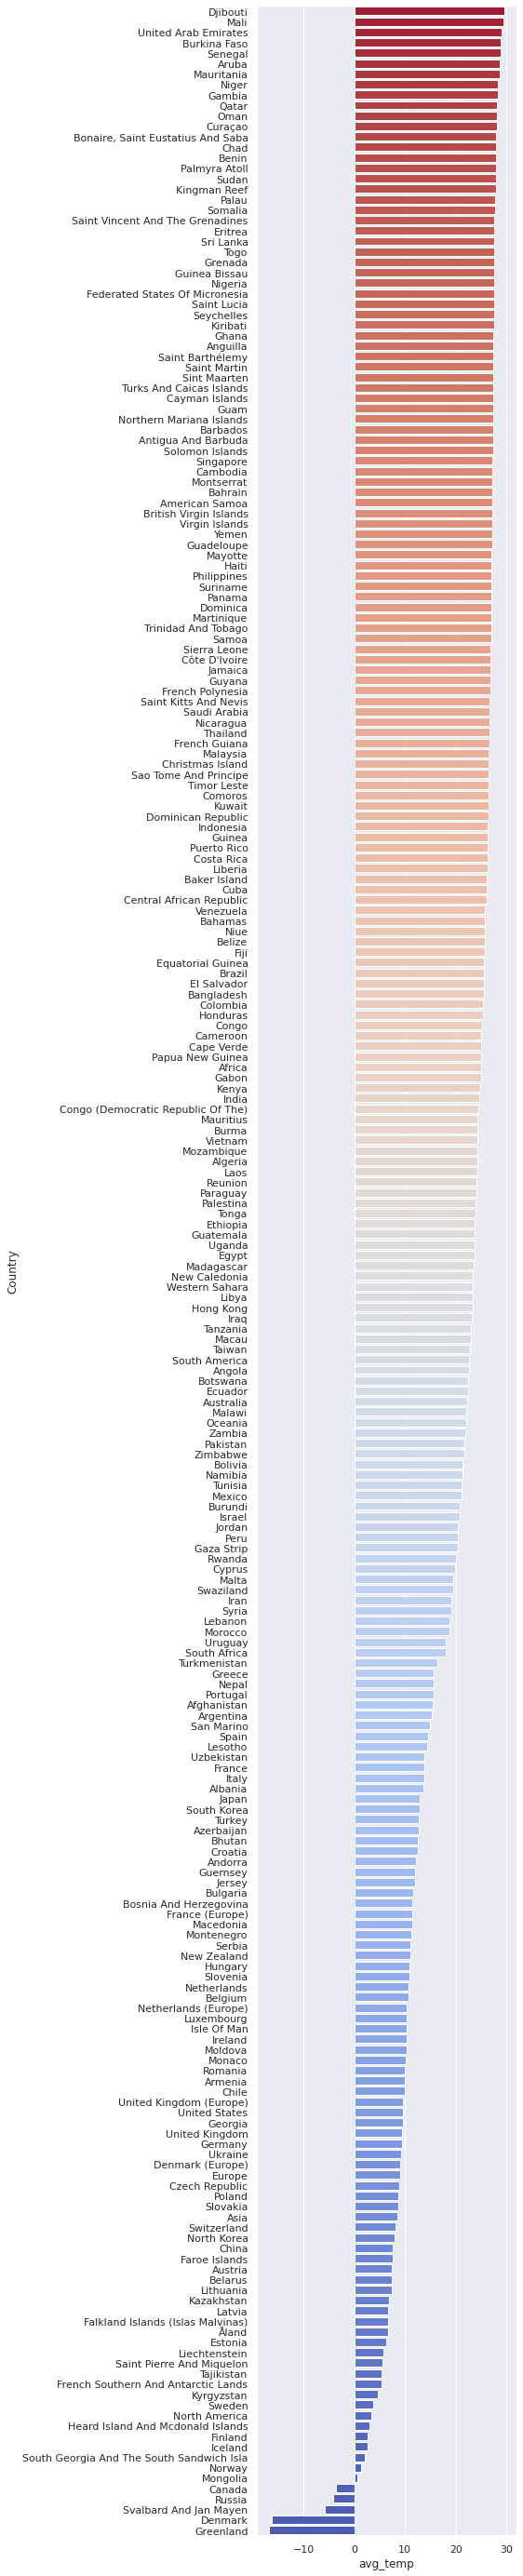

In [ ]:
sns.set(font_scale=1) 
f,ax = plt.subplots(figsize=(5, 50))
colors = sns.color_palette('coolwarm', len(country))
sns.barplot(x=avg_temp_country.avg_temp,y=avg_temp_country.Country,palette = colors[::-1])

In [ ]:
import plotly.colors
data = dict(
    type = 'choropleth',
    locations = avg_temp_country.Country,
    locationmode = 'country names',
    colorscale = 'Viridis',
    z = avg_temp_country.avg_temp,
    colorbar = dict(
            title = "Average Temperature")
        )
layout = dict(geo = dict(scope='world',       
        showframe = True,
        showocean = True,
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,
                    lat = 30),
        ),
        lonaxis =  dict(
                showgrid = True
            ),
        lataxis = dict(
                showgrid = True
                )
        ),title = 'Average Temperature from 2000 to 2010')
map = go.Figure(data = [data], layout = layout)
py.iplot(map)

In [ ]:
map.write_html('avg_temp.html')

In [ ]:
layout = dict(geo = dict(scope = 'world'),title = 'Average Temperature from 2000 to 2010')
map = go.Figure(data = [data], layout = layout)
py.iplot(map)

#### Temperature difference 

In [ ]:
query='''Select Country, max(AverageTemperature)-min(AverageTemperature) as temp_diff
from temp_country_eleven
group by Country
'''

country_diff = ps.sqldf(query,locals())
country_diff

Country  temp_diff
0       Afghanistan     32.962
1            Africa      6.250
2           Albania     24.684
3           Algeria     25.081
4    American Samoa      2.402
..              ...        ...
237  Western Sahara     14.348
238           Yemen     12.776
239          Zambia      9.358
240        Zimbabwe     11.002
241           Åland     26.029

[242 rows x 2 columns]

In [ ]:
data = dict(
    type = 'choropleth',
    locations = country_diff.Country,
    locationmode = 'country names',
    colorscale = 'Viridis',
    z = country_diff.temp_diff,
    colorbar = dict(
            title = "Temperature Difference")
        )
layout = dict(geo = dict(scope = 'world'),title = 'Temperature Difference from 2000 to 2010')
map = go.Figure(data = [data], layout = layout)
py.iplot(map)


In [ ]:
map.write_html('temp_diff.html')

#### Annual Average Temperature Change

In [ ]:
annual = temp_country_clean

In [ ]:
annual['year'] = annual['dt'].dt.year
annual['month'] = annual['dt'].dt.month
annual['day'] = annual['dt'].dt.day

In [ ]:
annual.head(12)

dt  AverageTemperature  ...  month day
0  1743-11-01               4.384  ...     11   1
5  1744-04-01               1.530  ...      4   1
6  1744-05-01               6.702  ...      5   1
7  1744-06-01              11.609  ...      6   1
8  1744-07-01              15.342  ...      7   1
10 1744-09-01              11.702  ...      9   1
11 1744-10-01               5.477  ...     10   1
12 1744-11-01               3.407  ...     11   1
13 1744-12-01              -2.181  ...     12   1
14 1745-01-01              -3.850  ...      1   1
15 1745-02-01              -6.575  ...      2   1
16 1745-03-01              -4.195  ...      3   1

[12 rows x 7 columns]

In [ ]:
query='''select year, Country, Avg(AverageTemperature) as avg_temp
from annual
group by year,Country
'''

temp_annual_avg = ps.sqldf(query,locals())
temp_annual_avg

year         Country  avg_temp
0      1743         Albania   8.62000
1      1743         Andorra   7.55600
2      1743         Austria   2.48200
3      1743         Belarus   0.76700
4      1743         Belgium   7.10600
...     ...             ...       ...
45910  2013  Western Sahara  23.74425
45911  2013           Yemen  28.12975
45912  2013          Zambia  21.19600
45913  2013        Zimbabwe  20.71075
45914  2013           Åland   6.22975

[45915 rows x 3 columns]

In [ ]:
data_slider = []
for year in temp_annual_avg['year'].unique():
    df_segmented =  temp_annual_avg[(temp_annual_avg['year']== year)]

    for col in df_segmented.columns:
        df_segmented[col] = df_segmented[col].astype(str)

    data_each_yr = dict(
                        type='choropleth',
                        locations = df_segmented['Country'],
                        z=df_segmented['avg_temp'].astype(float),
                        locationmode='country names',
                        colorbar= {'title':'Avg Temp'})

    data_slider.append(data_each_yr)

steps = []
for i in range(len(data_slider)):
    step = dict(method='restyle',
                args=['visible', [False] * len(data_slider)],
                label='Year {}'.format(i + 1743))
    step['args'][1][i] = True
    steps.append(step)

sliders = [dict(active=0, pad={"t": 1}, steps=steps)]

layout = dict(title ='Average Temperature', geo=dict(scope='world'
                       ),
              sliders=sliders)


In [ ]:
fig = dict(data=data_slider, layout=layout)
py.iplot(fig)

## Dataset: Temperature by City

### Basic information of the dataset


As shown below, the dataset GlobalLandTemperaturesByCity has seven columns, including 
*   `dt`(object)
*   `AverageTemperature`(float)
*   `AverageTemperatureUncertainty`(float)
*   `City`(object)
*   `Country`(object)
*   `Latitude`(object)
*   `Longitude`(object)




In [ ]:
temp_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   dt                             object 
 1   AverageTemperature             float64
 2   AverageTemperatureUncertainty  float64
 3   City                           object 
 4   Country                        object 
 5   Latitude                       object 
 6   Longitude                      object 
dtypes: float64(2), object(5)
memory usage: 459.2+ MB


In [ ]:
temp_city.describe()

AverageTemperature  AverageTemperatureUncertainty
count        8.235082e+06                   8.235082e+06
mean         1.672743e+01                   1.028575e+00
std          1.035344e+01                   1.129733e+00
min         -4.270400e+01                   3.400000e-02
25%          1.029900e+01                   3.370000e-01
50%          1.883100e+01                   5.910000e-01
75%          2.521000e+01                   1.349000e+00
max          3.965100e+01                   1.539600e+01

In [ ]:
temp_city.head(10)

dt  AverageTemperature  ...  Latitude Longitude
0  1743-11-01               6.068  ...    57.05N    10.33E
1  1743-12-01                 NaN  ...    57.05N    10.33E
2  1744-01-01                 NaN  ...    57.05N    10.33E
3  1744-02-01                 NaN  ...    57.05N    10.33E
4  1744-03-01                 NaN  ...    57.05N    10.33E
5  1744-04-01               5.788  ...    57.05N    10.33E
6  1744-05-01              10.644  ...    57.05N    10.33E
7  1744-06-01              14.051  ...    57.05N    10.33E
8  1744-07-01              16.082  ...    57.05N    10.33E
9  1744-08-01                 NaN  ...    57.05N    10.33E

[10 rows x 7 columns]

Notice that there are `NaN` in columns `AverageTemperature` and `AverageTemperatureUncertainty`, which needed to be deleted. Also, the datatype of column `dt` is object and we want to change it into `datetime`. 

In [ ]:
temp_city_clean = temp_city.dropna()
temp_city_clean['dt'] = pd.to_datetime(temp_city_clean['dt'])
temp_city_clean

dt  AverageTemperature  ...  Latitude Longitude
0       1743-11-01               6.068  ...    57.05N    10.33E
5       1744-04-01               5.788  ...    57.05N    10.33E
6       1744-05-01              10.644  ...    57.05N    10.33E
7       1744-06-01              14.051  ...    57.05N    10.33E
8       1744-07-01              16.082  ...    57.05N    10.33E
...            ...                 ...  ...       ...       ...
8599206 2013-04-01               7.710  ...    52.24N     5.26E
8599207 2013-05-01              11.464  ...    52.24N     5.26E
8599208 2013-06-01              15.043  ...    52.24N     5.26E
8599209 2013-07-01              18.775  ...    52.24N     5.26E
8599210 2013-08-01              18.025  ...    52.24N     5.26E

[8235082 rows x 7 columns]

In [ ]:
city = temp_city_clean[['City','Country']].drop_duplicates().reset_index().drop('index',axis=1)
city 

City      Country
0       Århus      Denmark
1       Çorlu       Turkey
2       Çorum       Turkey
3     Öskemen   Kazakhstan
4      Ürümqi        China
...       ...          ...
3485  Zouxian        China
3486    Zunyi        China
3487   Zurich  Switzerland
3488  Zuwarah        Libya
3489   Zwolle  Netherlands

[3490 rows x 2 columns]

### Feature explorations

For all 3490 cities, we want to choose the data between 2000-1-1 and 2010-12-31 to be consistent with other datasets.

In [ ]:
temp_city_eleven = temp_city_clean[temp_city_clean['dt']>='2000-1-1']
temp_city_eleven = temp_city_eleven[temp_city_clean['dt']<='2010-12-31']
temp_city_eleven 

dt  AverageTemperature  ...  Latitude Longitude
3074    2000-01-01               3.065  ...    57.05N    10.33E
3075    2000-02-01               3.724  ...    57.05N    10.33E
3076    2000-03-01               3.976  ...    57.05N    10.33E
3077    2000-04-01               8.321  ...    57.05N    10.33E
3078    2000-05-01              13.567  ...    57.05N    10.33E
...            ...                 ...  ...       ...       ...
8599174 2010-08-01              16.912  ...    52.24N     5.26E
8599175 2010-09-01              13.661  ...    52.24N     5.26E
8599176 2010-10-01              10.279  ...    52.24N     5.26E
8599177 2010-11-01               5.385  ...    52.24N     5.26E
8599178 2010-12-01              -1.778  ...    52.24N     5.26E

[463320 rows x 7 columns]

We want to make sure that the number of data are the same for each city. 

In [ ]:
temp_city_eleven_city = temp_city_eleven.groupby(['City','Country','Latitude','Longitude']).size().reset_index(name='Counts')
temp_city_eleven_city = temp_city_eleven_city.sort_values(['Counts'])
temp_city_eleven_city 

City        Country Latitude Longitude  Counts
0     A Coruña          Spain   42.59N     8.73W     132
2333  Pasuruan      Indonesia    7.23S   112.70E     132
2334     Patan          India   23.31N    72.52E     132
2335      Pate         Taiwan   24.92N   120.59E     132
2336  Paterson  United States   40.99N    74.56W     132
...        ...            ...      ...       ...     ...
1174  Hengshui          China   37.78N   115.93E     132
1175  Hengyang          China   26.52N   112.84E     132
1176   Henzada          Burma   16.87N    95.44E     132
1165      Hebi          China   36.17N   113.37E     132
3509    Ürümqi          China   44.20N    87.20E     132

[3510 rows x 5 columns]

Then, we will find out the coolest and hottest city for each month. 

In [ ]:
query='''SELECT dt,City, Country, max(AverageTemperature) AS Max_temp
FROM temp_city_eleven
GROUP BY dt
'''
hot_city = ps.sqldf(query,locals())
hot_city

dt           City   Country  Max_temp
0    2000-01-01 00:00:00.000000         Tamale     Ghana    29.364
1    2000-02-01 00:00:00.000000  Abomey Calavi     Benin    29.181
2    2000-03-01 00:00:00.000000         Tamale     Ghana    30.943
3    2000-04-01 00:00:00.000000         Niamey     Niger    35.007
4    2000-05-01 00:00:00.000000      Jacobabad  Pakistan    36.602
..                          ...            ...       ...       ...
127  2010-08-01 00:00:00.000000          Ahvaz      Iran    38.295
128  2010-09-01 00:00:00.000000         Abadan      Iran    35.107
129  2010-10-01 00:00:00.000000       Khartoum     Sudan    32.944
130  2010-11-01 00:00:00.000000          Kusti     Sudan    30.872
131  2010-12-01 00:00:00.000000        Mossoró    Brazil    29.414

[132 rows x 4 columns]

In [ ]:
query='''SELECT City, Country, count(Country) AS Count_hot
FROM hot_city
GROUP BY City
ORDER BY Count_hot DESC
'''
freq_hot_city = ps.sqldf(query,locals())
freq_hot_city

City       Country  Count_hot
0           Ahvaz          Iran         29
1         Mossoró        Brazil         27
2       Jacobabad      Pakistan         13
3          Niamey         Niger         13
4        Khartoum         Sudan          7
5     Ouagadougou  Burkina Faso          6
6            Sarh          Chad          5
7          Tamale         Ghana          5
8          Abadan          Iran          4
9   Abomey Calavi         Benin          4
10           Doha         Qatar          4
11       Adilabad         India          3
12          Mopti          Mali          3
13           Bida       Nigeria          2
14       Buraydah  Saudi Arabia          1
15      Fortaleza        Brazil          1
16        Kassala         Sudan          1
17           Kota         India          1
18          Kusti         Sudan          1
19       Magangué      Colombia          1
20        Malakal         Sudan          1

In [ ]:
fig = px.pie(freq_hot_city,values='Count_hot',names='City',title='Frequency of the hottest cities')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [ ]:
query='''SELECT dt,City, Country, min(AverageTemperature) AS Min_temp
FROM temp_city_eleven
GROUP BY dt
'''
cool_city = ps.sqldf(query,locals())
cool_city

dt          City Country  Min_temp
0    2000-01-01 00:00:00.000000         Kyzyl  Russia   -33.123
1    2000-02-01 00:00:00.000000       Norilsk  Russia   -26.475
2    2000-03-01 00:00:00.000000       Norilsk  Russia   -20.378
3    2000-04-01 00:00:00.000000       Norilsk  Russia   -15.080
4    2000-05-01 00:00:00.000000       Norilsk  Russia    -4.961
..                          ...           ...     ...       ...
127  2010-08-01 00:00:00.000000  San Bernardo   Chile     0.320
128  2010-09-01 00:00:00.000000       Norilsk  Russia     0.991
129  2010-10-01 00:00:00.000000       Norilsk  Russia    -7.219
130  2010-11-01 00:00:00.000000       Norilsk  Russia   -22.269
131  2010-12-01 00:00:00.000000       Norilsk  Russia   -31.604

[132 rows x 4 columns]

In [ ]:
query='''SELECT City, Country,count(Country) AS Count_cool
FROM cool_city
GROUP BY City
ORDER BY Count_cool DESC
'''
freq_cool_city = ps.sqldf(query,locals())
freq_cool_city

City Country  Count_cool
0          Norilsk  Russia          79
1     San Bernardo   Chile          26
2     Punta Arenas   Chile          13
3            Kyzyl  Russia          12
4  Blagoveshchensk  Russia           1
5   Nizhnevartovsk  Russia           1

In [ ]:
fig = px.pie(freq_cool_city,values='Count_cool',names='City',title='Frequency of the coolest cities')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

During 2000 to 2010, the hottest city is Ahvaz in Iran and the coolest city is Norilsk in Russian. 

Next, we want to find the average temperature of each city during the period of 2000 and 2010. 




In [ ]:
query='''SELECT City, Country,avg(AverageTemperature) AS avg_temp
FROM temp_city_eleven
GROUP BY City
ORDER BY avg_temp DESC
'''
avg_temp_city = ps.sqldf(query,locals())
avg_temp_city

City   Country   avg_temp
0         Jibuti  Djibouti  30.033742
1       Khartoum     Sudan  29.944780
2     Umm Durman     Sudan  29.944780
3        Kassala     Sudan  29.822682
4         Niamey     Niger  29.795598
...          ...       ...        ...
3443      Surgut    Russia  -2.350402
3444  Ust Ilimsk    Russia  -2.741182
3445       Chita    Russia  -2.966386
3446       Kyzyl    Russia  -4.666712
3447     Norilsk    Russia -10.885212

[3448 rows x 3 columns]

In [ ]:
query = ''' SELECT * FROM avg_temp_city 
WHERE Country = 'United States' 
'''
avg_temp_city_us = ps.sqldf(query,locals())
avg_temp_city_us

City        Country   avg_temp
0      Coral Springs  United States  23.725795
1    Fort Lauderdale  United States  23.725795
2            Hialeah  United States  23.725795
3          Hollywood  United States  23.725795
4              Miami  United States  23.725795
..               ...            ...        ...
243      Sioux Falls  United States   7.543583
244      Minneapolis  United States   6.253030
245       Saint Paul  United States   6.253030
246           Arvada  United States   3.285295
247        Anchorage  United States  -0.894962

[248 rows x 3 columns]

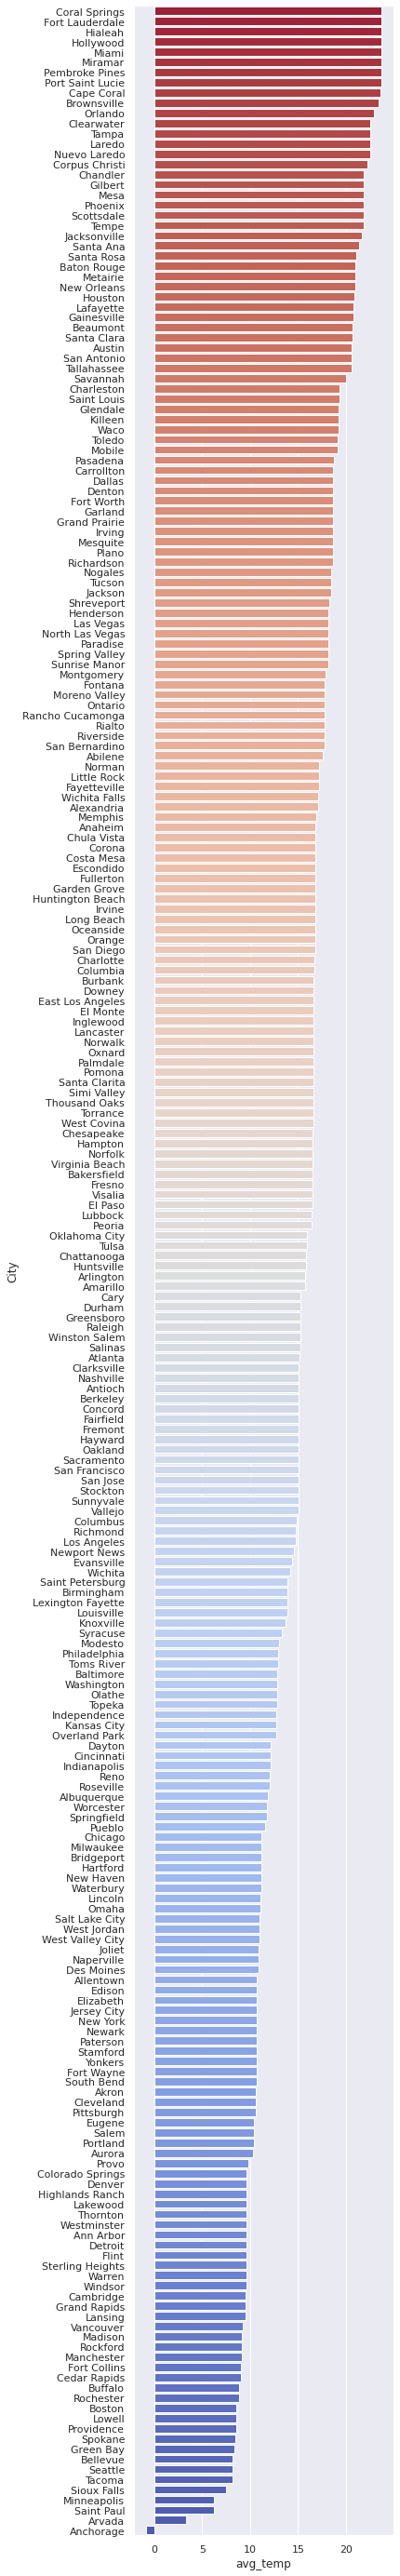

In [ ]:
sns.set(font_scale=1) 
f,ax = plt.subplots(figsize=(5, 50))
colors = sns.color_palette('coolwarm', len(avg_temp_city_us))
sns.barplot(x=avg_temp_city_us.avg_temp,y=avg_temp_city_us.City,palette = colors[::-1])


## Dataset: Temperature by major city

### Basic information of the dataset


As shown below, the dataset GlobalLandTemperaturesByMajorCity has seven columns, including 
*   `dt`(object)
*   `AverageTemperature`(float)
*   `AverageTemperatureUncertainty`(float)
*   `City`(object)
*   `Country`(object)
*   `Latitude`(object)
*   `Longitude`(object)


In [ ]:
temp_majorcity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239177 entries, 0 to 239176
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             239177 non-null  object 
 1   AverageTemperature             228175 non-null  float64
 2   AverageTemperatureUncertainty  228175 non-null  float64
 3   City                           239177 non-null  object 
 4   Country                        239177 non-null  object 
 5   Latitude                       239177 non-null  object 
 6   Longitude                      239177 non-null  object 
dtypes: float64(2), object(5)
memory usage: 12.8+ MB


In [ ]:
temp_majorcity.describe()

AverageTemperature  AverageTemperatureUncertainty
count       228175.000000                  228175.000000
mean            18.125969                       0.969343
std             10.024800                       0.979644
min            -26.772000                       0.040000
25%             12.710000                       0.340000
50%             20.428000                       0.592000
75%             25.918000                       1.320000
max             38.283000                      14.037000

In [ ]:
temp_majorcity.head(10)

dt  AverageTemperature  ...  Latitude Longitude
0  1849-01-01              26.704  ...     5.63N     3.23W
1  1849-02-01              27.434  ...     5.63N     3.23W
2  1849-03-01              28.101  ...     5.63N     3.23W
3  1849-04-01              26.140  ...     5.63N     3.23W
4  1849-05-01              25.427  ...     5.63N     3.23W
5  1849-06-01              24.844  ...     5.63N     3.23W
6  1849-07-01              24.058  ...     5.63N     3.23W
7  1849-08-01              23.576  ...     5.63N     3.23W
8  1849-09-01              23.662  ...     5.63N     3.23W
9  1849-10-01              25.263  ...     5.63N     3.23W

[10 rows x 7 columns]

Notice that there are `NaN` in columns `AverageTemperature` and `AverageTemperatureUncertainty`, which needed to be deleted. Also, the datatype of column `dt` is object and we want to change it into `datetime`. 


In [ ]:
temp_majorcity_clean = temp_majorcity.dropna()
temp_majorcity_clean['dt'] = pd.to_datetime(temp_majorcity_clean['dt'])
temp_majorcity_clean

dt  AverageTemperature  ...  Latitude Longitude
0      1849-01-01              26.704  ...     5.63N     3.23W
1      1849-02-01              27.434  ...     5.63N     3.23W
2      1849-03-01              28.101  ...     5.63N     3.23W
3      1849-04-01              26.140  ...     5.63N     3.23W
4      1849-05-01              25.427  ...     5.63N     3.23W
...           ...                 ...  ...       ...       ...
239171 2013-04-01              12.563  ...    34.56N   108.97E
239172 2013-05-01              18.979  ...    34.56N   108.97E
239173 2013-06-01              23.522  ...    34.56N   108.97E
239174 2013-07-01              25.251  ...    34.56N   108.97E
239175 2013-08-01              24.528  ...    34.56N   108.97E

[228175 rows x 7 columns]

Now, since this dataset mainly focuses on some major cities, we want to find how many cities are included.  



In [ ]:
majorcity = temp_majorcity_clean[['City','Country']].drop_duplicates().reset_index().drop('index',axis=1)
majorcity

City        Country
0       Abidjan  Côte D'Ivoire
1   Addis Abeba       Ethiopia
2     Ahmadabad          India
3        Aleppo          Syria
4    Alexandria          Egypt
..          ...            ...
95        Tokyo          Japan
96      Toronto         Canada
97   Umm Durman          Sudan
98        Wuhan          China
99         Xian          China

[100 rows x 2 columns]

### Feature explorations

For the 100 major cities, we want to choose the data between 2000-1-1 and 2010-12-31 to be consistent with other datasets.

In [ ]:
temp_majorcity_eleven = temp_majorcity_clean[temp_majorcity_clean['dt']>='2000-1-1']
temp_majorcity_eleven = temp_majorcity_eleven[temp_majorcity_clean['dt']<='2010-12-31']
temp_majorcity_eleven 

dt  AverageTemperature  ...  Latitude Longitude
1812   2000-01-01              27.293  ...     5.63N     3.23W
1813   2000-02-01              27.685  ...     5.63N     3.23W
1814   2000-03-01              29.061  ...     5.63N     3.23W
1815   2000-04-01              28.162  ...     5.63N     3.23W
1816   2000-05-01              27.547  ...     5.63N     3.23W
...           ...                 ...  ...       ...       ...
239139 2010-08-01              23.434  ...    34.56N   108.97E
239140 2010-09-01              19.630  ...    34.56N   108.97E
239141 2010-10-01              12.292  ...    34.56N   108.97E
239142 2010-11-01               6.742  ...    34.56N   108.97E
239143 2010-12-01               0.845  ...    34.56N   108.97E

[13200 rows x 7 columns]

Now, we want to check if we have enough and same number of data for each city.

In [ ]:
temp_majorcity_eleven_city = temp_majorcity_eleven.groupby(['City']).size().reset_index(name='Counts')
temp_majorcity_eleven_city = temp_majorcity_eleven_city.sort_values(['Counts'])
temp_majorcity_eleven_city 

City  Counts
0     Abidjan     132
72      Paris     132
71   New York     132
70  New Delhi     132
69    Nanjing     132
..        ...     ...
28     Durban     132
27      Dhaka     132
26      Delhi     132
36  Hyderabad     132
99       Xian     132

[100 rows x 2 columns]

Since we are sorting by `Counts`, which is the total number of data we have for each city, and we find that all major cities have 132 entries, the exact number of months during 2001 and 2010. So, we have enough and consistent data for each city. 

Then, we will find out the coolest and hottest city for each month. 

In [ ]:
query='''SELECT dt,City, Country,max(AverageTemperature) as Max_temp
FROM temp_majorcity_eleven
GROUP BY dt
'''
hot_majorcity = ps.sqldf(query,locals())
hot_majorcity

dt           City       Country  Max_temp
0    2000-01-01 00:00:00.000000  Dar Es Salaam      Tanzania    28.068
1    2000-02-01 00:00:00.000000         Ibadan       Nigeria    28.349
2    2000-03-01 00:00:00.000000      Mogadishu       Somalia    29.415
3    2000-04-01 00:00:00.000000         Nagpur         India    32.968
4    2000-05-01 00:00:00.000000     Faisalabad      Pakistan    34.845
..                          ...            ...           ...       ...
127  2010-08-01 00:00:00.000000        Baghdad          Iraq    37.899
128  2010-09-01 00:00:00.000000         Riyadh  Saudi Arabia    33.945
129  2010-10-01 00:00:00.000000     Umm Durman         Sudan    32.944
130  2010-11-01 00:00:00.000000     Umm Durman         Sudan    30.783
131  2010-12-01 00:00:00.000000      Fortaleza        Brazil    28.277

[132 rows x 4 columns]

In [ ]:
query='''SELECT City, Country,count(Country) as Count_hot
from hot_majorcity
group by City
order by Count_hot DESC
'''
freq_hot_majorcity = ps.sqldf(query,locals())
freq_hot_majorcity

City        Country  Count_hot
0          Riyadh   Saudi Arabia         35
1      Umm Durman          Sudan         24
2       Fortaleza         Brazil         22
3          Ibadan        Nigeria         13
4         Baghdad           Iraq          8
5   Dar Es Salaam       Tanzania          6
6          Nagpur          India          6
7       Hyderabad          India          4
8       Mogadishu        Somalia          4
9          Jaipur          India          3
10     Faisalabad       Pakistan          2
11           Kano        Nigeria          2
12        Abidjan  Côte D'Ivoire          1
13        Rangoon          Burma          1
14       Surabaya      Indonesia          1

In [ ]:
fig=px.pie(freq_hot_majorcity,values='Count_hot',names='City',title='Frequency of the hottest major cities')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [ ]:
query='''SELECT dt,City, Country,min(AverageTemperature) as Min_temp
FROM temp_majorcity_eleven
GROUP BY dt
'''
cool_majorcity = ps.sqldf(query,locals())
cool_majorcity

dt      City Country  Min_temp
0    2000-01-01 00:00:00.000000    Harbin   China   -20.823
1    2000-02-01 00:00:00.000000    Harbin   China   -14.946
2    2000-03-01 00:00:00.000000    Harbin   China    -2.712
3    2000-04-01 00:00:00.000000  Montreal  Canada     4.070
4    2000-05-01 00:00:00.000000  Santiago   Chile     2.347
..                          ...       ...     ...       ...
127  2010-08-01 00:00:00.000000  Santiago   Chile     0.320
128  2010-09-01 00:00:00.000000  Santiago   Chile     3.352
129  2010-10-01 00:00:00.000000    Moscow  Russia     3.298
130  2010-11-01 00:00:00.000000    Harbin   China    -4.684
131  2010-12-01 00:00:00.000000    Harbin   China   -17.757

[132 rows x 4 columns]

In [ ]:
query='''SELECT City, Country,count(Country) as Count_cool
from cool_majorcity
group by City
order by Count_cool DESC
'''
freq_cool_majorcity = ps.sqldf(query,locals())
freq_cool_majorcity

City Country  Count_cool
0          Santiago   Chile          58
1            Harbin   China          47
2  Saint Petersburg  Russia          14
3          Montreal  Canada           8
4            Moscow  Russia           5

In [ ]:
fig=px.pie(freq_cool_majorcity,values='Count_cool',names='City',title='Frequency of the coolest major cities')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

We can see that throughout the target years, the hottest city is Riyadh in Saudi Arabia and the coolest city is Santiago in Chile. 

The average temperature of each major city is shown below. 


In [ ]:
query='''SELECT City, Country,avg(AverageTemperature) AS avg_temp
FROM temp_majorcity_eleven
GROUP BY City
ORDER BY avg_temp DESC
'''
avg_temp_majorcity = ps.sqldf(query,locals())
avg_temp_majorcity

City       Country   avg_temp
0         Umm Durman         Sudan  29.944780
1             Madras         India  29.085159
2             Jiddah  Saudi Arabia  28.648742
3          Mogadishu       Somalia  27.915576
4   Ho Chi Minh City       Vietnam  27.867348
..               ...           ...        ...
95         Changchun         China   6.204265
96          Montreal        Canada   5.781629
97            Moscow        Russia   5.677652
98  Saint Petersburg        Russia   5.359379
99            Harbin         China   4.907553

[100 rows x 3 columns]

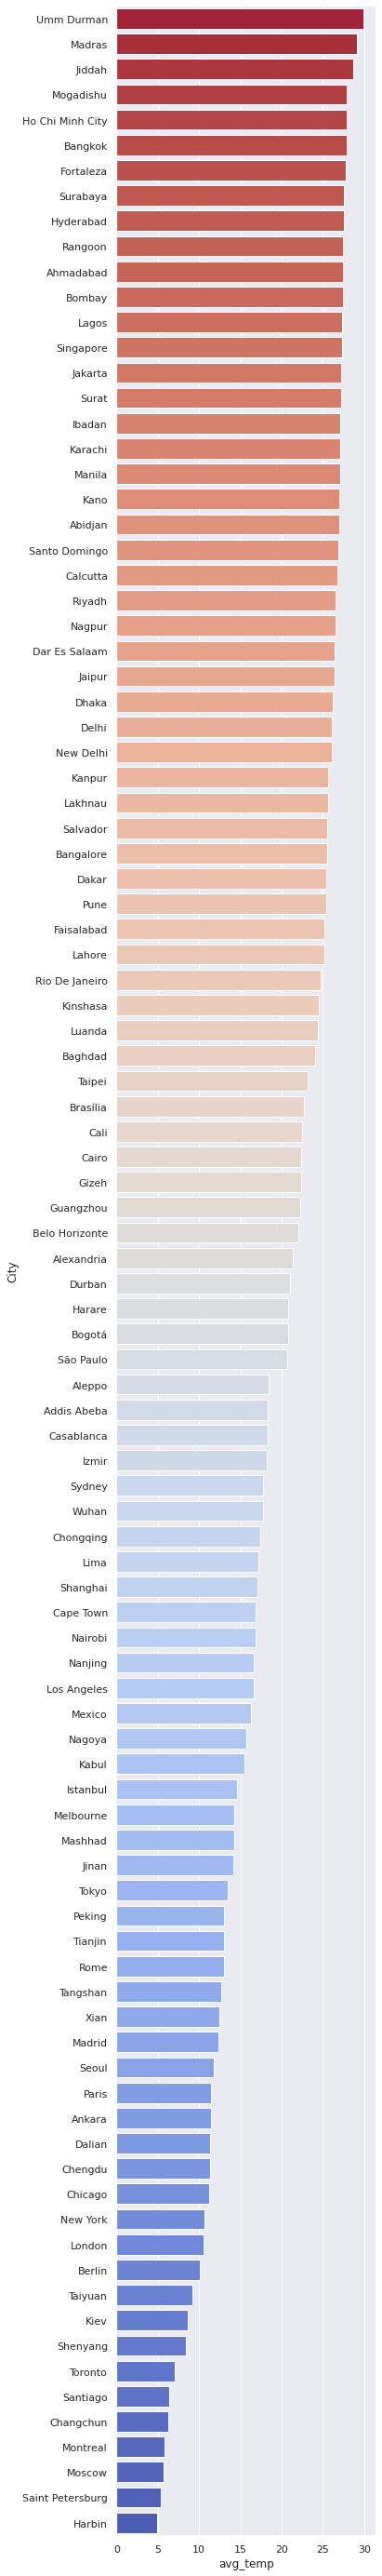

In [ ]:
sns.set(font_scale=1) 
f,ax=plt.subplots(figsize=(5, 50))
colors=sns.color_palette('coolwarm', len(majorcity))
sns.barplot(x=avg_temp_majorcity.avg_temp,y=avg_temp_majorcity.City,palette = colors[::-1])

## Dataset: Global Temperature
We now move on to explore the overall trend of global temperature changes over the year. We will take LandAverageTemperature as the variable to investigate into.

### Basic information of the dataset


In [ ]:
temp_global.head(10)

dt  ...  LandAndOceanAverageTemperatureUncertainty
0  1750-01-01  ...                                        NaN
1  1750-02-01  ...                                        NaN
2  1750-03-01  ...                                        NaN
3  1750-04-01  ...                                        NaN
4  1750-05-01  ...                                        NaN
5  1750-06-01  ...                                        NaN
6  1750-07-01  ...                                        NaN
7  1750-08-01  ...                                        NaN
8  1750-09-01  ...                                        NaN
9  1750-10-01  ...                                        NaN

[10 rows x 9 columns]

In [ ]:
temp_global.shape, temp_global.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


((3192, 9), None)

### Feature explorations

In [ ]:
temp_global = temp_global[['dt', 'LandAverageTemperature']]
temp_global['dt'] = pd.to_datetime(temp_global['dt'])
temp_global['year'] = temp_global['dt'].map(lambda x: x.year)
temp_global['month'] = temp_global['dt'].map(lambda x: x.month)
temp_global

dt  LandAverageTemperature  year  month
0    1750-01-01                   3.034  1750      1
1    1750-02-01                   3.083  1750      2
2    1750-03-01                   5.626  1750      3
3    1750-04-01                   8.490  1750      4
4    1750-05-01                  11.573  1750      5
...         ...                     ...   ...    ...
3187 2015-08-01                  14.755  2015      8
3188 2015-09-01                  12.999  2015      9
3189 2015-10-01                  10.801  2015     10
3190 2015-11-01                   7.433  2015     11
3191 2015-12-01                   5.518  2015     12

[3192 rows x 4 columns]

In [ ]:
def get_month(month):
    if month ==1 :
        return 'January'
    elif month ==2:
        return 'Feburary'
    elif month ==3:
        return 'March'
    elif month ==4:
        return 'April'
    elif month ==5:
        return 'May'
    elif month ==6:
        return 'June'
    elif month ==7:
        return 'July'
    elif month ==8:
        return 'August'
    elif month ==9:
        return 'September'
    elif month ==10:
        return 'October'
    elif month ==11:
        return 'November'
    else:
        return 'December'    
    

temp_global['CalenderMonth'] = temp_global['month'].apply(get_month)

Jan_temps = []
Feb_temps = []
Mar_temps = []
Apr_temps = []
May_temps = []
Jun_temps = []
Jul_temps = []
Aug_temps = []
Sep_temps = []
Oct_temps = []
Nov_temps = []
Dec_temps = []

min_year = temp_global['year'].min()
max_year = temp_global['year'].max()
years = range(min_year, max_year + 1)

for year in years:
    current_year = temp_global[temp_global['year'] == year]
    Jan_temps.append(current_year[current_year['CalenderMonth'] == 'January']['LandAverageTemperature'].mean())
    Feb_temps.append(current_year[current_year['CalenderMonth'] == 'Feburary']['LandAverageTemperature'].mean())
    Mar_temps.append(current_year[current_year['CalenderMonth'] == 'March']['LandAverageTemperature'].mean())
    Apr_temps.append(current_year[current_year['CalenderMonth'] == 'April']['LandAverageTemperature'].mean())
    May_temps.append(current_year[current_year['CalenderMonth'] == 'May']['LandAverageTemperature'].mean())
    Jun_temps.append(current_year[current_year['CalenderMonth'] == 'June']['LandAverageTemperature'].mean())
    Jul_temps.append(current_year[current_year['CalenderMonth'] == 'July']['LandAverageTemperature'].mean())
    Aug_temps.append(current_year[current_year['CalenderMonth'] == 'August']['LandAverageTemperature'].mean())
    Sep_temps.append(current_year[current_year['CalenderMonth'] == 'September']['LandAverageTemperature'].mean())
    Oct_temps.append(current_year[current_year['CalenderMonth'] == 'October']['LandAverageTemperature'].mean())
    Nov_temps.append(current_year[current_year['CalenderMonth'] == 'November']['LandAverageTemperature'].mean())
    Dec_temps.append(current_year[current_year['CalenderMonth'] == 'December']['LandAverageTemperature'].mean())
    

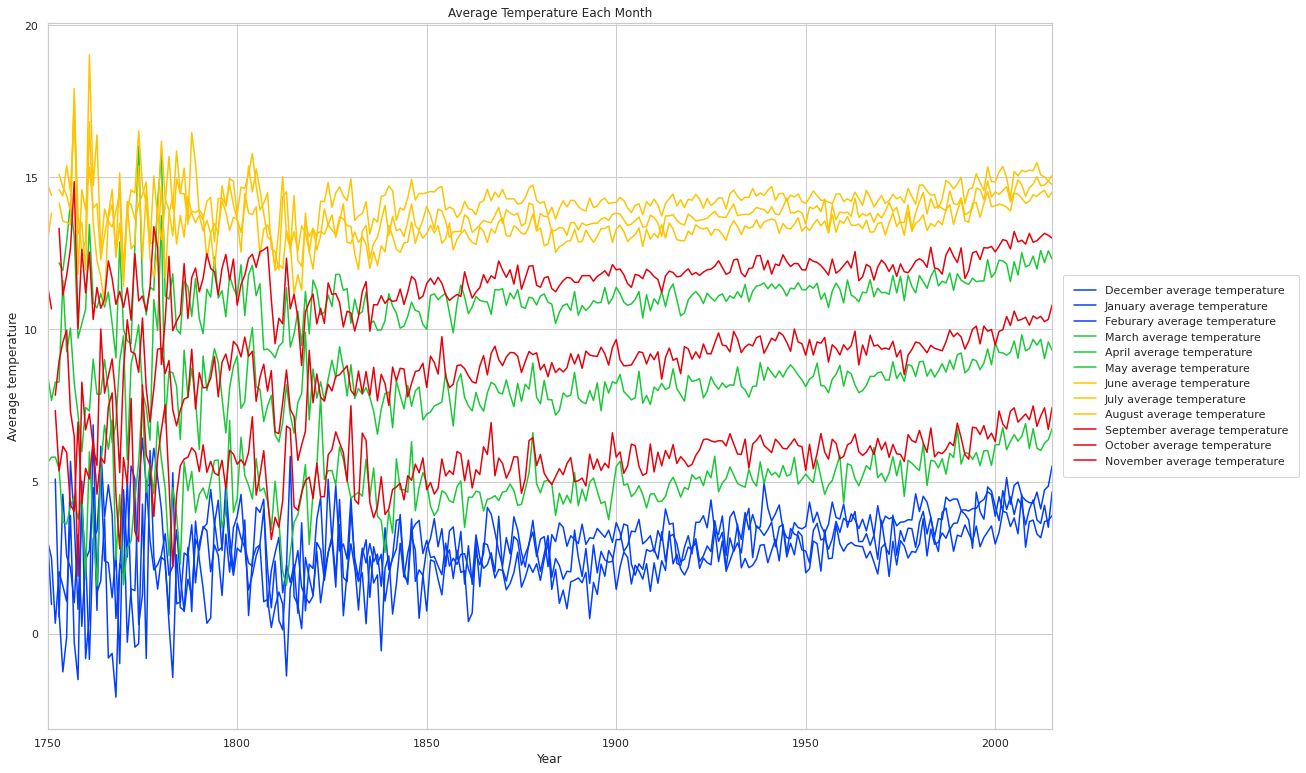

In [ ]:
sns.set(style="whitegrid")
sns.set_color_codes("bright")
f, ax = plt.subplots(figsize=(18, 13))

plt.plot(years, Dec_temps, label='December average temperature', color='b')
plt.plot(years, Jan_temps, label='January average temperature', color='b')
plt.plot(years, Feb_temps, label='Feburary average temperature', color='b')
plt.plot(years, Mar_temps, label='March average temperature', color='g')
plt.plot(years, Apr_temps, label='April average temperature', color='g')
plt.plot(years, May_temps, label='May average temperature', color='g')
plt.plot(years, Jun_temps, label='June average temperature', color='y')
plt.plot(years, Jul_temps, label='July average temperature', color='y')
plt.plot(years, Aug_temps, label='August average temperature', color='y')
plt.plot(years, Sep_temps, label='September average temperature', color='r')
plt.plot(years, Oct_temps, label='October average temperature', color='r')
plt.plot(years, Nov_temps, label='November average temperature', color='r')

plt.xlim(min_year, max_year)

ax.set_ylabel('Average temperature')
ax.set_xlabel('Year')
ax.set_title('Average Temperature Each Month')
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, borderpad=1, borderaxespad=1)

## Dataset: Country GDP 


### Basic information of the dataset


In [ ]:
gdp_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 65 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            132 non-null    float64
 5   1961            133 non-null    float64
 6   1962            136 non-null    float64
 7   1963            136 non-null    float64
 8   1964            136 non-null    float64
 9   1965            147 non-null    float64
 10  1966            150 non-null    float64
 11  1967            153 non-null    float64
 12  1968            158 non-null    float64
 13  1969            158 non-null    float64
 14  1970            167 non-null    float64
 15  1971            170 non-null    float64
 16  1972            170 non-null    float64
 17  1973            170 non-null    flo

In [ ]:
gdp_country.describe()

1960         1961  ...           2019           2020
count   132.000000   133.000000  ...     247.000000     225.000000
mean    477.200539   493.526118  ...   15957.206310   12720.027451
std     617.353139   641.312996  ...   23605.053254   18154.974764
min      40.537211    40.689268  ...     261.245291     274.009523
25%     106.866402   109.129250  ...    2220.107287    1838.209968
50%     209.736812   197.391359  ...    6609.510431    4949.749700
75%     474.397772   476.901484  ...   17971.488235   13828.469500
max    3007.123445  3066.562869  ...  190512.737400  115873.602600

[8 rows x 61 columns]

In [ ]:
gdp_country.head(10)

Country Name Country Code  ...          2019         2020
0                        Aruba          ABW  ...           NaN          NaN
1  Africa Eastern and Southern          AFE  ...   1485.307425  1330.140232
2                  Afghanistan          AFG  ...    507.103392   508.808409
3   Africa Western and Central          AFW  ...   1772.339155  1714.426800
4                       Angola          AGO  ...   2809.626088  1895.770869
5                      Albania          ALB  ...   5355.847795  5215.276752
6                      Andorra          AND  ...  40897.330870          NaN
7                   Arab World          ARB  ...   6403.540772  5654.950574
8         United Arab Emirates          ARE  ...  43103.336290          NaN
9                    Argentina          ARG  ...   9912.281809  8441.919439

[10 rows x 65 columns]

### Feature explorations


As for the main datasets, we want to focus on the country GPD data during the period of 2000 and 2010. 

In [ ]:
gdp_country_eleven = gdp_country[['Country Name','Country Code','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010']]
gdp_country_eleven 

Country Name Country Code  ...          2009          2010
0                          Aruba          ABW  ...  24631.182050  23513.527700
1    Africa Eastern and Southern          AFE  ...   1329.727043   1554.183379
2                    Afghanistan          AFG  ...    438.076142    543.302967
3     Africa Western and Central          AFW  ...   1444.201899   1655.130138
4                         Angola          AGO  ...   3122.781599   3587.883645
..                           ...          ...  ...           ...           ...
261                       Kosovo          XKX  ...   3209.694109   3286.557443
262                  Yemen, Rep.          YEM  ...   1116.084396   1334.784902
263                 South Africa          ZAF  ...   5862.797108   7328.615200
264                       Zambia          ZMB  ...   1159.907499   1489.459087
265                     Zimbabwe          ZWE  ...    771.599032    948.331481

[266 rows x 13 columns]

Now, we need to remove rows that contain `NaN` for further compuations.

In [ ]:
gdp_country_eleven = gdp_country_eleven.dropna()
gdp_country_eleven

Country Name Country Code  ...          2009          2010
0                          Aruba          ABW  ...  24631.182050  23513.527700
1    Africa Eastern and Southern          AFE  ...   1329.727043   1554.183379
3     Africa Western and Central          AFW  ...   1444.201899   1655.130138
4                         Angola          AGO  ...   3122.781599   3587.883645
5                        Albania          ALB  ...   4114.140114   4094.350334
..                           ...          ...  ...           ...           ...
261                       Kosovo          XKX  ...   3209.694109   3286.557443
262                  Yemen, Rep.          YEM  ...   1116.084396   1334.784902
263                 South Africa          ZAF  ...   5862.797108   7328.615200
264                       Zambia          ZMB  ...   1159.907499   1489.459087
265                     Zimbabwe          ZWE  ...    771.599032    948.331481

[244 rows x 13 columns]

In [ ]:
gdp_country_eleven['Mean GDP'] = gdp_country_eleven.mean(axis=1)
gdp_country_eleven

Country Name Country Code  ...          2010      Mean GDP
0                          Aruba          ABW  ...  23513.527700  23048.797917
1    Africa Eastern and Southern          AFE  ...   1554.183379   1022.591910
3     Africa Western and Central          AFW  ...   1655.130138   1046.539491
4                         Angola          AGO  ...   3587.883645   2055.525689
5                        Albania          ALB  ...   4094.350334   2715.796773
..                           ...          ...  ...           ...           ...
261                       Kosovo          XKX  ...   3286.557443   2230.722454
262                  Yemen, Rep.          YEM  ...   1334.784902    860.607350
263                 South Africa          ZAF  ...   7328.615200   4801.782520
264                       Zambia          ZMB  ...   1489.459087    818.476364
265                     Zimbabwe          ZWE  ...    948.331481    550.527404

[244 rows x 14 columns]

In [ ]:
avg_gdp_country = gdp_country_eleven[['Country Name','Mean GDP']]
avg_gdp_country_sort = avg_gdp_country.sort_values(by='Mean GDP', ascending=False)
avg_gdp_country_sort

Country Name       Mean GDP
149            Monaco  128026.210635
137     Liechtenstein  107238.051040
27            Bermuda   81802.917023
144        Luxembourg   80864.910292
177            Norway   65291.974253
..                ...            ...
168            Malawi     308.127135
210      Sierra Leone     302.828476
43   Congo, Dem. Rep.     256.546189
72           Ethiopia     205.734237
16            Burundi     161.102541

[244 rows x 2 columns]

In [ ]:
import plotly.colors
data = dict(
    type = 'choropleth',
    locations = avg_gdp_country['Country Name'],
    locationmode = 'country names',
   
    z = avg_gdp_country['Mean GDP'],
    colorbar = dict(
            title = "Average GDP")
        )
layout = dict(geo = dict(scope='world',       
        showframe = True,
        showocean = True,
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,
                    lat = 30),
        ),
        lonaxis =  dict(
                showgrid = True
            ),
        lataxis = dict(
                showgrid = True
                )
        ),title = 'Average GDP from 2000 to 2010')
map = go.Figure(data = [data], layout = layout)
py.iplot(map)

## Dataset: Country Population


### Basic information of the dataset


In [ ]:
population_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 65 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            264 non-null    float64
 5   1961            264 non-null    float64
 6   1962            264 non-null    float64
 7   1963            264 non-null    float64
 8   1964            264 non-null    float64
 9   1965            264 non-null    float64
 10  1966            264 non-null    float64
 11  1967            264 non-null    float64
 12  1968            264 non-null    float64
 13  1969            264 non-null    float64
 14  1970            264 non-null    float64
 15  1971            264 non-null    float64
 16  1972            264 non-null    float64
 17  1973            264 non-null    flo

In [ ]:
population_country.describe()

1960          1961  ...          2019          2020
count  2.640000e+02  2.640000e+02  ...  2.640000e+02  2.640000e+02
mean   1.173116e+08  1.188586e+08  ...  3.138333e+08  3.174775e+08
std    3.705555e+08  3.749081e+08  ...  9.789569e+08  9.893473e+08
min    2.833000e+03  3.077000e+03  ...  1.076400e+04  1.083400e+04
25%    5.022802e+05  5.109642e+05  ...  1.751950e+06  1.756929e+06
50%    3.718330e+06  3.826398e+06  ...  1.047907e+07  1.052617e+07
75%    2.636053e+07  2.721235e+07  ...  6.150589e+07  6.160448e+07
max    3.032156e+09  3.071596e+09  ...  7.673345e+09  7.752841e+09

[8 rows x 61 columns]

In [ ]:
population_country.head(10)

Country Name Country Code  ...         2019         2020
0                        Aruba          ABW  ...     106310.0     106766.0
1  Africa Eastern and Southern          AFE  ...  660046272.0  677243299.0
2                  Afghanistan          AFG  ...   38041757.0   38928341.0
3   Africa Western and Central          AFW  ...  446911598.0  458803476.0
4                       Angola          AGO  ...   31825299.0   32866268.0
5                      Albania          ALB  ...    2854191.0    2837743.0
6                      Andorra          AND  ...      77146.0      77265.0
7                   Arab World          ARB  ...  427870273.0  436080728.0
8         United Arab Emirates          ARE  ...    9770526.0    9890400.0
9                    Argentina          ARG  ...   44938712.0   45376763.0

[10 rows x 65 columns]

### Feature explorations


In [ ]:
pop_country_eleven = population_country[['Country Name','Country Code','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010']]
pop_country_eleven

Country Name Country Code  ...         2009         2010
0                          Aruba          ABW  ...     101452.0     101665.0
1    Africa Eastern and Southern          AFE  ...  504604672.0  518468229.0
2                    Afghanistan          AFG  ...   28394806.0   29185511.0
3     Africa Western and Central          AFW  ...  341050537.0  350556886.0
4                         Angola          AGO  ...   22514275.0   23356247.0
..                           ...          ...  ...          ...          ...
261                       Kosovo          XKX  ...    1761474.0    1775680.0
262                  Yemen, Rep.          YEM  ...   22516464.0   23154854.0
263                 South Africa          ZAF  ...   50477013.0   51216967.0
264                       Zambia          ZMB  ...   13215142.0   13605986.0
265                     Zimbabwe          ZWE  ...   12526964.0   12697728.0

[266 rows x 13 columns]

In [ ]:
pop_country_eleven = pop_country_eleven.dropna()
pop_country_eleven

Country Name Country Code  ...         2009         2010
0                          Aruba          ABW  ...     101452.0     101665.0
1    Africa Eastern and Southern          AFE  ...  504604672.0  518468229.0
2                    Afghanistan          AFG  ...   28394806.0   29185511.0
3     Africa Western and Central          AFW  ...  341050537.0  350556886.0
4                         Angola          AGO  ...   22514275.0   23356247.0
..                           ...          ...  ...          ...          ...
261                       Kosovo          XKX  ...    1761474.0    1775680.0
262                  Yemen, Rep.          YEM  ...   22516464.0   23154854.0
263                 South Africa          ZAF  ...   50477013.0   51216967.0
264                       Zambia          ZMB  ...   13215142.0   13605986.0
265                     Zimbabwe          ZWE  ...   12526964.0   12697728.0

[265 rows x 13 columns]

In [ ]:
pop_country_eleven['Mean Population'] = pop_country_eleven.mean(axis=1)
pop_country_eleven

Country Name Country Code  ...         2010  Mean Population
0                          Aruba          ABW  ...     101665.0     9.827936e+04
1    Africa Eastern and Southern          AFE  ...  518468229.0     4.553758e+08
2                    Afghanistan          AFG  ...   29185511.0     2.526234e+07
3     Africa Western and Central          AFW  ...  350556886.0     3.069037e+08
4                         Angola          AGO  ...   23356247.0     1.961775e+07
..                           ...          ...  ...          ...              ...
261                       Kosovo          XKX  ...    1775680.0     1.723164e+06
262                  Yemen, Rep.          YEM  ...   23154854.0     2.017612e+07
263                 South Africa          ZAF  ...   51216967.0     4.796945e+07
264                       Zambia          ZMB  ...   13605986.0     1.191724e+07
265                     Zimbabwe          ZWE  ...   12697728.0     1.216856e+07

[265 rows x 14 columns]

In [ ]:
avg_pop_country = pop_country_eleven[['Country Name','Mean Population']]
avg_pop_country_sort = avg_pop_country.sort_values(by='Mean Population', ascending=False)
avg_pop_country_sort

Country Name  Mean Population
259                     World     6.514668e+09
103          IDA & IBRD total     5.426646e+09
140       Low & middle income     5.375159e+09
156             Middle income     4.926934e+09
102                 IBRD only     4.208921e+09
..                        ...              ...
228  Turks and Caicos Islands     2.731318e+04
255    British Virgin Islands     2.356582e+04
188                     Palau     1.920445e+04
179                     Nauru     9.991545e+03
245                    Tuvalu     9.967364e+03

[265 rows x 2 columns]

In [ ]:
import plotly.colors
data = dict(
    type = 'choropleth',
    locations = avg_pop_country['Country Name'],
    locationmode = 'country names',
    z = avg_pop_country['Mean Population'],
    colorbar = dict(
            title = "Average Population")
        )
layout = dict(geo = dict(scope='world',       
        showframe = True,
        showocean = True,
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,
                    lat = 30),
        ),
        lonaxis =  dict(
                showgrid = True
            ),
        lataxis = dict(
                showgrid = True
                )
        ),title = 'Average Population from 2000 to 2010')
map = go.Figure(data = [data], layout = layout)
py.iplot(map)

## Dataset: Country Surface Area


### Basic information of the dataset


In [ ]:
surface_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 65 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            0 non-null      float64
 5   1961            258 non-null    float64
 6   1962            258 non-null    float64
 7   1963            258 non-null    float64
 8   1964            258 non-null    float64
 9   1965            258 non-null    float64
 10  1966            258 non-null    float64
 11  1967            258 non-null    float64
 12  1968            258 non-null    float64
 13  1969            258 non-null    float64
 14  1970            258 non-null    float64
 15  1971            258 non-null    float64
 16  1972            258 non-null    float64
 17  1973            258 non-null    flo

In [ ]:
surface_country.describe()

1960          1961          1962  ...          2018  2019  2020
count   0.0  2.580000e+02  2.580000e+02  ...  2.640000e+02   0.0   0.0
mean    NaN  5.313340e+06  5.313340e+06  ...  5.344140e+06   NaN   NaN
std     NaN  1.539313e+07  1.539313e+07  ...  1.554088e+07   NaN   NaN
min     NaN  2.027000e+00  2.027000e+00  ...  1.000000e+01   NaN   NaN
25%     NaN  2.302750e+04  2.302750e+04  ...  2.090000e+04   NaN   NaN
50%     NaN  2.112850e+05  2.112850e+05  ...  2.037750e+05   NaN   NaN
75%     NaN  1.261925e+06  1.261925e+06  ...  1.251775e+06   NaN   NaN
max     NaN  1.316353e+08  1.316353e+08  ...  1.345427e+08   NaN   NaN

[8 rows x 61 columns]

In [ ]:
surface_country.head(10)

Country Name Country Code  ... 2019 2020
0                        Aruba          ABW  ...  NaN  NaN
1  Africa Eastern and Southern          AFE  ...  NaN  NaN
2                  Afghanistan          AFG  ...  NaN  NaN
3   Africa Western and Central          AFW  ...  NaN  NaN
4                       Angola          AGO  ...  NaN  NaN
5                      Albania          ALB  ...  NaN  NaN
6                      Andorra          AND  ...  NaN  NaN
7                   Arab World          ARB  ...  NaN  NaN
8         United Arab Emirates          ARE  ...  NaN  NaN
9                    Argentina          ARG  ...  NaN  NaN

[10 rows x 65 columns]

### Feature explorations


In [ ]:
surf_country_eleven = surface_country[['Country Name','Country Code','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010']]
surf_country_eleven

Country Name Country Code  ...         2009         2010
0                          Aruba          ABW  ...       180.00       180.00
1    Africa Eastern and Southern          AFE  ...  12632894.49  12632895.13
2                    Afghanistan          AFG  ...    652860.00    652860.00
3     Africa Western and Central          AFW  ...   9166270.00   9166270.00
4                         Angola          AGO  ...   1246700.00   1246700.00
..                           ...          ...  ...          ...          ...
261                       Kosovo          XKX  ...     10887.00     10887.00
262                  Yemen, Rep.          YEM  ...    527970.00    527970.00
263                 South Africa          ZAF  ...   1219090.00   1219090.00
264                       Zambia          ZMB  ...    752610.00    752610.00
265                     Zimbabwe          ZWE  ...    390760.00    390760.00

[266 rows x 13 columns]

In [ ]:
surf_country_eleven = surf_country_eleven.dropna()
surf_country_eleven

Country Name Country Code  ...         2009         2010
0                          Aruba          ABW  ...       180.00       180.00
1    Africa Eastern and Southern          AFE  ...  12632894.49  12632895.13
2                    Afghanistan          AFG  ...    652860.00    652860.00
3     Africa Western and Central          AFW  ...   9166270.00   9166270.00
4                         Angola          AGO  ...   1246700.00   1246700.00
..                           ...          ...  ...          ...          ...
261                       Kosovo          XKX  ...     10887.00     10887.00
262                  Yemen, Rep.          YEM  ...    527970.00    527970.00
263                 South Africa          ZAF  ...   1219090.00   1219090.00
264                       Zambia          ZMB  ...    752610.00    752610.00
265                     Zimbabwe          ZWE  ...    390760.00    390760.00

[263 rows x 13 columns]

In [ ]:
surf_country_eleven['Mean Surface Area'] = surf_country_eleven.mean(axis=1)
avg_surf_country = surf_country_eleven[['Country Name','Mean Surface Area']]
avg_surf_country_sort = avg_surf_country.sort_values(by='Mean Surface Area', ascending=False)
avg_surf_country_sort

Country Name  Mean Surface Area
259                World       1.316291e+08
103     IDA & IBRD total       9.602724e+07
140  Low & middle income       9.404349e+07
156        Middle income       8.130942e+07
102            IBRD only       7.298155e+07
..                   ...                ...
245               Tuvalu       3.000000e+01
149               Monaco       2.853355e+01
146     Macao SAR, China       2.747273e+01
179                Nauru       2.000000e+01
84             Gibraltar       1.000000e+01

[263 rows x 2 columns]

In [ ]:
import plotly.colors
data = dict(
    type = 'choropleth',
    locations = avg_surf_country['Country Name'],
    locationmode = 'country names',
    z = avg_surf_country['Mean Surface Area'],
    colorbar = dict(
            title = "Average Surface Area")
        )
layout = dict(geo = dict(scope='world',       
        showframe = True,
        showocean = True,
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,
                    lat = 30),
        ),
        lonaxis =  dict(
                showgrid = True
            ),
        lataxis = dict(
                showgrid = True
                )
        ),title = 'Average Surface Area from 2000 to 2010')
map = go.Figure(data = [data], layout = layout)
py.iplot(map)

## Dataset: Country Agricultural Land

### Basic information of the dataset


In [ ]:
argiland_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 65 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            0 non-null      float64
 5   1961            222 non-null    float64
 6   1962            222 non-null    float64
 7   1963            222 non-null    float64
 8   1964            222 non-null    float64
 9   1965            222 non-null    float64
 10  1966            222 non-null    float64
 11  1967            222 non-null    float64
 12  1968            222 non-null    float64
 13  1969            222 non-null    float64
 14  1970            222 non-null    float64
 15  1971            222 non-null    float64
 16  1972            222 non-null    float64
 17  1973            222 non-null    flo

In [ ]:
argiland_country.describe()

1960        1961        1962  ...        2018  2019  2020
count   0.0  222.000000  222.000000  ...  257.000000   0.0   0.0
mean    NaN   35.688060   35.725929  ...   37.270536   NaN   NaN
std     NaN   21.161160   21.142174  ...   20.184422   NaN   NaN
min     NaN    0.262821    0.269231  ...    0.538462   NaN   NaN
25%     NaN   19.483310   19.503763  ...   22.727244   NaN   NaN
50%     NaN   34.927574   35.108653  ...   38.024667   NaN   NaN
75%     NaN   51.221235   51.302587  ...   48.546930   NaN   NaN
max     NaN   93.440750   92.840818  ...   80.769320   NaN   NaN

[8 rows x 61 columns]

In [ ]:
argiland_country.head(10)

Country Name Country Code  ... 2019 2020
0                        Aruba          ABW  ...  NaN  NaN
1  Africa Eastern and Southern          AFE  ...  NaN  NaN
2                  Afghanistan          AFG  ...  NaN  NaN
3   Africa Western and Central          AFW  ...  NaN  NaN
4                       Angola          AGO  ...  NaN  NaN
5                      Albania          ALB  ...  NaN  NaN
6                      Andorra          AND  ...  NaN  NaN
7                   Arab World          ARB  ...  NaN  NaN
8         United Arab Emirates          ARE  ...  NaN  NaN
9                    Argentina          ARG  ...  NaN  NaN

[10 rows x 65 columns]

### Feature explorations


In [ ]:
argiland_country_eleven = argiland_country[['Country Name','Country Code','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010']]
argiland_country_eleven

Country Name Country Code  ...       2009       2010
0                          Aruba          ABW  ...  11.111111  11.111111
1    Africa Eastern and Southern          AFE  ...  43.652181  43.799190
2                    Afghanistan          AFG  ...  58.067580  58.069111
3     Africa Western and Central          AFW  ...  39.094094  39.265777
4                         Angola          AGO  ...  41.675575  42.120799
..                           ...          ...  ...        ...        ...
261                       Kosovo          XKX  ...        NaN        NaN
262                  Yemen, Rep.          YEM  ...  44.419190  44.659734
263                 South Africa          ZAF  ...  79.951199  79.871238
264                       Zambia          ZMB  ...  31.727626  31.525848
265                     Zimbabwe          ZWE  ...  42.135195  41.876696

[266 rows x 13 columns]

In [ ]:
argiland_country_eleven = argiland_country_eleven.dropna()
argiland_country_eleven

Country Name Country Code  ...       2009       2010
0                          Aruba          ABW  ...  11.111111  11.111111
1    Africa Eastern and Southern          AFE  ...  43.652181  43.799190
2                    Afghanistan          AFG  ...  58.067580  58.069111
3     Africa Western and Central          AFW  ...  39.094094  39.265777
4                         Angola          AGO  ...  41.675575  42.120799
..                           ...          ...  ...        ...        ...
260                        Samoa          WSM  ...  12.332155  14.664311
262                  Yemen, Rep.          YEM  ...  44.419190  44.659734
263                 South Africa          ZAF  ...  79.951199  79.871238
264                       Zambia          ZMB  ...  31.727626  31.525848
265                     Zimbabwe          ZWE  ...  42.135195  41.876696

[254 rows x 13 columns]

In [ ]:
argiland_country_eleven['Mean Agricultural land'] = argiland_country_eleven.mean(axis=1)
avg_argiland_country = argiland_country_eleven[['Country Name','Mean Agricultural land']]
avg_argiland_country_sort = avg_argiland_country.sort_values(by='Mean Agricultural land', ascending=False)
avg_argiland_country_sort

Country Name  Mean Agricultural land
250                   Uruguay               84.456322
205              Saudi Arabia               80.787758
263              South Africa               80.332045
120                Kazakhstan               78.911606
108               Isle of Man               77.614035
..                        ...                     ...
23               Bahamas, The                1.335029
208                 Singapore                1.279491
228  Turks and Caicos Islands                1.052632
91                  Greenland                0.587891
220                  Suriname                0.495979

[254 rows x 2 columns]

In [ ]:
import plotly.colors
data = dict(
    type = 'choropleth',
    locations = avg_argiland_country['Country Name'],
    locationmode = 'country names',
    z = avg_argiland_country['Mean Agricultural land'],
    colorbar = dict(
            title = "Average Agricultural land")
        )
layout = dict(geo = dict(scope='world',       
        showframe = True,
        showocean = True,
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,
                    lat = 30),
        ),
        lonaxis =  dict(
                showgrid = True
            ),
        lataxis = dict(
                showgrid = True
                )
        ),title = 'Average Agricultural land from 2000 to 2010')
map = go.Figure(data = [data], layout = layout)
py.iplot(map)

## Dataset: Country CO2 Emissions

### Basic information of the dataset


In [ ]:
CO2_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 65 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            203 non-null    float64
 5   1961            204 non-null    float64
 6   1962            206 non-null    float64
 7   1963            207 non-null    float64
 8   1964            213 non-null    float64
 9   1965            213 non-null    float64
 10  1966            213 non-null    float64
 11  1967            213 non-null    float64
 12  1968            213 non-null    float64
 13  1969            213 non-null    float64
 14  1970            214 non-null    float64
 15  1971            215 non-null    float64
 16  1972            216 non-null    float64
 17  1973            216 non-null    flo

In [ ]:
CO2_country.describe()

1960        1961        1962  ...        2018  2019  2020
count  203.000000  204.000000  206.000000  ...  239.000000   0.0   0.0
mean     3.160220    3.292338    3.462051  ...    4.158613   NaN   NaN
std     14.821169   15.114669   16.286958  ...    4.547079   NaN   NaN
min      0.007984    0.007857    0.008435  ...    0.026169   NaN   NaN
25%      0.195031    0.185078    0.211355  ...    0.827804   NaN   NaN
50%      0.616754    0.662374    0.659399  ...    2.691814   NaN   NaN
75%      2.060142    2.420962    2.526705  ...    6.069018   NaN   NaN
max    204.631696  208.837879  226.081890  ...   32.415639   NaN   NaN

[8 rows x 61 columns]

In [ ]:
CO2_country.head(10)

Country Name Country Code  ... 2019 2020
0                        Aruba          ABW  ...  NaN  NaN
1  Africa Eastern and Southern          AFE  ...  NaN  NaN
2                  Afghanistan          AFG  ...  NaN  NaN
3   Africa Western and Central          AFW  ...  NaN  NaN
4                       Angola          AGO  ...  NaN  NaN
5                      Albania          ALB  ...  NaN  NaN
6                      Andorra          AND  ...  NaN  NaN
7                   Arab World          ARB  ...  NaN  NaN
8         United Arab Emirates          ARE  ...  NaN  NaN
9                    Argentina          ARG  ...  NaN  NaN

[10 rows x 65 columns]

### Feature explorations


In [ ]:
CO2_country_eleven = CO2_country[['Country Name','Country Code','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010']]
CO2_country_eleven

Country Name Country Code  ...      2009      2010
0                          Aruba          ABW  ...       NaN       NaN
1    Africa Eastern and Southern          AFE  ...  1.021954  1.048876
2                    Afghanistan          AFG  ...  0.211306  0.297065
3     Africa Western and Central          AFW  ...  0.426770  0.472819
4                         Angola          AGO  ...  1.205902  1.221515
..                           ...          ...  ...       ...       ...
261                       Kosovo          XKX  ...       NaN       NaN
262                  Yemen, Rep.          YEM  ...  1.139166  1.036068
263                 South Africa          ZAF  ...  8.004039  8.300179
264                       Zambia          ZMB  ...  0.186907  0.194032
265                     Zimbabwe          ZWE  ...  0.618665  0.772579

[266 rows x 13 columns]

In [ ]:
CO2_country_eleven = CO2_country_eleven.dropna()
CO2_country_eleven

Country Name Country Code  ...      2009      2010
1    Africa Eastern and Southern          AFE  ...  1.021954  1.048876
2                    Afghanistan          AFG  ...  0.211306  0.297065
3     Africa Western and Central          AFW  ...  0.426770  0.472819
4                         Angola          AGO  ...  1.205902  1.221515
5                        Albania          ALB  ...  1.475652  1.572251
..                           ...          ...  ...       ...       ...
260                        Samoa          WSM  ...  1.029515  1.021813
262                  Yemen, Rep.          YEM  ...  1.139166  1.036068
263                 South Africa          ZAF  ...  8.004039  8.300179
264                       Zambia          ZMB  ...  0.186907  0.194032
265                     Zimbabwe          ZWE  ...  0.618665  0.772579

[239 rows x 13 columns]

In [ ]:
CO2_country_eleven['Mean CO2 emissions'] = CO2_country_eleven.mean(axis=1)
avg_CO2_country = CO2_country_eleven[['Country Name','Mean CO2 emissions']]
avg_CO2_country_sort = avg_CO2_country.sort_values(by='Mean CO2 emissions', ascending=False)
avg_CO2_country_sort

Country Name  Mean CO2 emissions
200                 Qatar           40.255565
127                Kuwait           26.510178
8    United Arab Emirates           24.525793
144            Luxembourg           22.706769
22                Bahrain           22.589130
..                    ...                 ...
203                Rwanda            0.059264
213               Somalia            0.055564
16                Burundi            0.028089
43       Congo, Dem. Rep.            0.025033
216           South Sudan            0.000000

[239 rows x 2 columns]

In [ ]:
import plotly.colors
data = dict(
    type = 'choropleth',
    locations = avg_CO2_country['Country Name'],
    locationmode = 'country names',
    z = avg_CO2_country['Mean CO2 emissions'],
    colorbar = dict(
            title = "Average CO2 emissions")
        )
layout = dict(geo = dict(scope='world',       
        showframe = True,
        showocean = True,
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,
                    lat = 30),
        ),
        lonaxis =  dict(
                showgrid = True
            ),
        lataxis = dict(
                showgrid = True
                )
        ),title = 'Average CO2 emissions from 2000 to 2010')
map = go.Figure(data = [data], layout = layout)
py.iplot(map)

## Dataset: Country Forest Area

### Basic information of the dataset


In [ ]:
forest_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 65 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            0 non-null      float64
 5   1961            0 non-null      float64
 6   1962            0 non-null      float64
 7   1963            0 non-null      float64
 8   1964            0 non-null      float64
 9   1965            0 non-null      float64
 10  1966            0 non-null      float64
 11  1967            0 non-null      float64
 12  1968            0 non-null      float64
 13  1969            0 non-null      float64
 14  1970            0 non-null      float64
 15  1971            0 non-null      float64
 16  1972            0 non-null      float64
 17  1973            0 non-null      flo

In [ ]:
forest_country.describe()

1960  1961  1962  1963  ...        2017        2018        2019        2020
count   0.0   0.0   0.0   0.0  ...  261.000000  261.000000  257.000000  257.000000
mean    NaN   NaN   NaN   NaN  ...   31.764381   31.720355   32.140857   32.089941
std     NaN   NaN   NaN   NaN  ...   22.925628   22.904554   22.736351   22.714853
min     NaN   NaN   NaN   NaN  ...    0.000000    0.000000    0.000000    0.000000
25%     NaN   NaN   NaN   NaN  ...   11.751292   11.752972   12.714441   12.601597
50%     NaN   NaN   NaN   NaN  ...   30.287544   30.269977   30.469798   30.431156
75%     NaN   NaN   NaN   NaN  ...   46.490760   46.735544   46.629944   46.511013
max     NaN   NaN   NaN   NaN  ...   97.647564   97.569103   97.490577   97.412115

[8 rows x 61 columns]

In [ ]:
forest_country.head(10)

Country Name Country Code  ...       2019       2020
0                        Aruba          ABW  ...   2.333333   2.333333
1  Africa Eastern and Southern          AFE  ...  30.469798  30.251786
2                  Afghanistan          AFG  ...   1.850994   1.850994
3   Africa Western and Central          AFW  ...  19.901215  19.816762
4                       Angola          AGO  ...  53.872175  53.426951
5                      Albania          ALB  ...  28.791971  28.791971
6                      Andorra          AND  ...  34.042553  34.042553
7                   Arab World          ARB  ...   2.830679   2.812929
8         United Arab Emirates          ARE  ...   4.467756   4.467756
9                    Argentina          ARG  ...  10.480179  10.440715

[10 rows x 65 columns]

### Feature explorations


In [ ]:
forest_country_eleven = forest_country[['Country Name','Country Code','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010']]
forest_country_eleven

Country Name Country Code  ...       2009       2010
0                          Aruba          ABW  ...   2.333333   2.333333
1    Africa Eastern and Southern          AFE  ...  36.906596  31.910878
2                    Afghanistan          AFG  ...   1.850994   1.850994
3     Africa Western and Central          AFW  ...  20.766139  20.674012
4                         Angola          AGO  ...  58.324425  57.879201
..                           ...          ...  ...        ...        ...
261                       Kosovo          XKX  ...        NaN        NaN
262                  Yemen, Rep.          YEM  ...   1.039832   1.039832
263                 South Africa          ZAF  ...  14.385157  14.355151
264                       Zambia          ZMB  ...  62.863100  62.814942
265                     Zimbabwe          ZWE  ...  46.403903  46.284813

[266 rows x 13 columns]

In [ ]:
forest_country_eleven = forest_country_eleven.dropna()
forest_country_eleven

Country Name Country Code  ...       2009       2010
0                          Aruba          ABW  ...   2.333333   2.333333
1    Africa Eastern and Southern          AFE  ...  36.906596  31.910878
2                    Afghanistan          AFG  ...   1.850994   1.850994
3     Africa Western and Central          AFW  ...  20.766139  20.674012
4                         Angola          AGO  ...  58.324425  57.879201
..                           ...          ...  ...        ...        ...
260                        Samoa          WSM  ...  59.000707  58.830389
262                  Yemen, Rep.          YEM  ...   1.039832   1.039832
263                 South Africa          ZAF  ...  14.385157  14.355151
264                       Zambia          ZMB  ...  62.863100  62.814942
265                     Zimbabwe          ZWE  ...  46.403903  46.284813

[258 rows x 13 columns]

In [ ]:
forest_country_eleven['Mean Forest area'] = forest_country_eleven.mean(axis=1)
avg_forest_country = forest_country_eleven[['Country Name','Mean Forest area']]
avg_forest_country_sort = avg_forest_country.sort_values(by='Mean Forest area', ascending=False)
avg_forest_country_sort

Country Name  Mean Forest area
220               Suriname         98.207468
94                  Guyana         94.193625
80                   Gabon         91.879943
88       Equatorial Guinea         91.757398
79   Micronesia, Fed. Sts.         91.421429
..                     ...               ...
91               Greenland          0.000536
200                  Qatar          0.000000
84               Gibraltar          0.000000
149                 Monaco          0.000000
179                  Nauru          0.000000

[258 rows x 2 columns]

In [ ]:
import plotly.colors
data = dict(
    type = 'choropleth',
    locations = avg_forest_country['Country Name'],
    locationmode = 'country names',
    z = avg_forest_country['Mean Forest area'],
    colorbar = dict(
            title = "Average Forest area")
        )
layout = dict(geo = dict(scope='world',       
        showframe = True,
        showocean = True,
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,
                    lat = 30),
        ),
        lonaxis =  dict(
                showgrid = True
            ),
        lataxis = dict(
                showgrid = True
                )
        ),title = 'Average Forest area from 2000 to 2010')
map = go.Figure(data = [data], layout = layout)
py.iplot(map)

## Dataset: Country Renewable Energy Consumption

### Basic information of the dataset


In [ ]:
energy_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 65 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            0 non-null      float64
 5   1961            0 non-null      float64
 6   1962            0 non-null      float64
 7   1963            0 non-null      float64
 8   1964            0 non-null      float64
 9   1965            0 non-null      float64
 10  1966            0 non-null      float64
 11  1967            0 non-null      float64
 12  1968            0 non-null      float64
 13  1969            0 non-null      float64
 14  1970            0 non-null      float64
 15  1971            0 non-null      float64
 16  1972            0 non-null      float64
 17  1973            0 non-null      flo

In [ ]:
energy_country.describe()

1960  1961  1962  1963  ...        2017        2018  2019  2020
count   0.0   0.0   0.0   0.0  ...  213.000000  213.000000   0.0   0.0
mean    NaN   NaN   NaN   NaN  ...   28.796227   28.839274   NaN   NaN
std     NaN   NaN   NaN   NaN  ...   27.776419   27.522908   NaN   NaN
min     NaN   NaN   NaN   NaN  ...    0.000000    0.000000   NaN   NaN
25%     NaN   NaN   NaN   NaN  ...    5.293100    5.858600   NaN   NaN
50%     NaN   NaN   NaN   NaN  ...   19.475100   20.863899   NaN   NaN
75%     NaN   NaN   NaN   NaN  ...   45.380100   43.972301   NaN   NaN
max     NaN   NaN   NaN   NaN  ...   96.699799   96.383698   NaN   NaN

[8 rows x 61 columns]

In [ ]:
energy_country.head(10)

Country Name Country Code  ... 2019 2020
0                        Aruba          ABW  ...  NaN  NaN
1  Africa Eastern and Southern          AFE  ...  NaN  NaN
2                  Afghanistan          AFG  ...  NaN  NaN
3   Africa Western and Central          AFW  ...  NaN  NaN
4                       Angola          AGO  ...  NaN  NaN
5                      Albania          ALB  ...  NaN  NaN
6                      Andorra          AND  ...  NaN  NaN
7                   Arab World          ARB  ...  NaN  NaN
8         United Arab Emirates          ARE  ...  NaN  NaN
9                    Argentina          ARG  ...  NaN  NaN

[10 rows x 65 columns]

### Feature explorations


In [ ]:
energy_country_eleven = energy_country[['Country Name','Country Code','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010']]
energy_country_eleven

Country Name Country Code  ...       2009       2010
0                          Aruba          ABW  ...   0.299800   5.464700
1    Africa Eastern and Southern          AFE  ...  61.252554  62.564529
2                    Afghanistan          AFG  ...  17.850401  14.899000
3     Africa Western and Central          AFW  ...  82.615425  80.933623
4                         Angola          AGO  ...  52.413898  50.764801
..                           ...          ...  ...        ...        ...
261                       Kosovo          XKX  ...  20.924200  20.925400
262                  Yemen, Rep.          YEM  ...   0.877400   0.978600
263                 South Africa          ZAF  ...  10.987500  11.787700
264                       Zambia          ZMB  ...  89.797096  89.869400
265                     Zimbabwe          ZWE  ...  82.342201  82.070000

[266 rows x 13 columns]

In [ ]:
energy_country_eleven = energy_country_eleven.dropna()
energy_country_eleven

Country Name Country Code  ...       2009       2010
0                          Aruba          ABW  ...   0.299800   5.464700
1    Africa Eastern and Southern          AFE  ...  61.252554  62.564529
2                    Afghanistan          AFG  ...  17.850401  14.899000
3     Africa Western and Central          AFW  ...  82.615425  80.933623
4                         Angola          AGO  ...  52.413898  50.764801
..                           ...          ...  ...        ...        ...
261                       Kosovo          XKX  ...  20.924200  20.925400
262                  Yemen, Rep.          YEM  ...   0.877400   0.978600
263                 South Africa          ZAF  ...  10.987500  11.787700
264                       Zambia          ZMB  ...  89.797096  89.869400
265                     Zimbabwe          ZWE  ...  82.342201  82.070000

[261 rows x 13 columns]

In [ ]:
energy_country_eleven['Mean Renewable energy consumption'] = energy_country_eleven.mean(axis=1)
avg_energy_country = energy_country_eleven[['Country Name','Mean Renewable energy consumption']]
avg_energy_country_sort = avg_energy_country.sort_values(by='Mean Renewable energy consumption', ascending=False)
avg_energy_country_sort

Country Name  Mean Renewable energy consumption
43           Congo, Dem. Rep.                          97.556645
16                    Burundi                          94.910337
72                   Ethiopia                          94.441818
247                    Uganda                          94.393800
213                   Somalia                          93.208045
..                        ...                                ...
84                  Gibraltar                           0.000000
93                       Guam                           0.000000
245                    Tuvalu                           0.000000
164  Northern Mariana Islands                           0.000000
216               South Sudan                           0.000000

[261 rows x 2 columns]

In [ ]:
import plotly.colors
data = dict(
    type = 'choropleth',
    locations = avg_energy_country['Country Name'],
    locationmode = 'country names',
    z = avg_energy_country['Mean Renewable energy consumption'],
    colorbar = dict(
            title = "Average Renewable energy consumption")
        )
layout = dict(geo = dict(scope='world',       
        showframe = True,
        showocean = True,
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,
                    lat = 30),
        ),
        lonaxis =  dict(
                showgrid = True
            ),
        lataxis = dict(
                showgrid = True
                )
        ),title = 'Average Renewable energy consumption from 2000 to 2010')
map = go.Figure(data = [data], layout = layout)
py.iplot(map)

# Create dataset for Machine Learning Task 

The main dataset we will use for machine learning models contains the 
* `Country`
* `Year`
* `average temperature`
* `GDP per capita`
* `Population, in total`
* `Surface area (sq. km)`
* `Agricultural land (% of land area)`
* `CO2 emissions (metric tons per capita)`
* `Forest area (% of land area)`
* `Renewable energy consumption (% of total final energy consumption)` 

We will focus on the data from 1990 to 2010. In order to obtain this dataset, we need to first merge the dataset `avg_temp_country` with additional datasets `gdp_country`,  `surface_country`, `population_country`, `argiland_country`, `CO2_country`, `forest_country`, `energy_country`. 

## Prepare the temperature data

In [ ]:
#Prepare for the annual temperature dataset
temp_annual_ml = temp_annual_avg[temp_annual_avg['year']>=1990]
temp_annual_ml = temp_annual_ml[temp_annual_ml['year']<=2010]

In [ ]:
temp_annual_ml

year         Country   avg_temp
40107  1990     Afghanistan  14.993333
40108  1990          Africa  24.703750
40109  1990         Albania  13.468667
40110  1990         Algeria  24.014417
40111  1990  American Samoa  27.156250
...     ...             ...        ...
45184  2010  Western Sahara  24.114250
45185  2010           Yemen  27.302750
45186  2010          Zambia  22.267500
45187  2010        Zimbabwe  21.986250
45188  2010           Åland   4.861917

[5082 rows x 3 columns]

In [ ]:
query='''select orig.year,orig.Country,orig.avg_temp,avg_annual.avg_year,orig.avg_temp-avg_annual.avg_year as diff
from temp_annual_ml as orig
join(
  select year,avg(avg_temp) as avg_year
  from temp_annual_ml
  group by year
) as avg_annual
on orig.year=avg_annual.year
'''

temp_annual_ml_avg=ps.sqldf(query,locals())
temp_annual_ml_avg

year         Country   avg_temp   avg_year       diff
0     1990     Afghanistan  14.993333  19.317686  -4.324353
1     1990          Africa  24.703750  19.317686   5.386064
2     1990         Albania  13.468667  19.317686  -5.849020
3     1990         Algeria  24.014417  19.317686   4.696730
4     1990  American Samoa  27.156250  19.317686   7.838564
...    ...             ...        ...        ...        ...
5077  2010  Western Sahara  24.114250  19.629806   4.484444
5078  2010           Yemen  27.302750  19.629806   7.672944
5079  2010          Zambia  22.267500  19.629806   2.637694
5080  2010        Zimbabwe  21.986250  19.629806   2.356444
5081  2010           Åland   4.861917  19.629806 -14.767889

[5082 rows x 5 columns]

## Define a function to transfer other dataset

In [ ]:
def data_merge(df,feature):
  df=df.drop(['Country Code','Indicator Name','Indicator Code'],axis=1)
  df_list=df.values
  years=df.columns.tolist()
  del years[0]
  country_name=df['Country Name'].tolist()
  list_trans=[[0,0,0] for i in range(len(country_name)*len(years))]
  for i in range(len(country_name)):
    for year in years:
      label=int(year)-int(years[0])
      list_trans[label+i*len(years)][0]=year
      list_trans[label+i*len(years)][1]=country_name[i]
      list_trans[label+i*len(years)][2]=df_list[i][int(year)-int(years[0])+1]
  df_trans=pd.DataFrame(list_trans)
  df_trans.columns=['Year','Country',feature]
  return df_trans

## Combine all the datasets

In [ ]:
gdp_ML = data_merge(gdp_country,'GDP per capita (current US$)')
area_ML = data_merge(surface_country,'Surface area (sq. km)')
popu_ML = data_merge(population_country,'Population, total')
argiland_ML = data_merge(argiland_country,'Agricultural land (% of land area)')
CO2_ML = data_merge(CO2_country,'CO2 emissions (metric tons per capita)')
forest_ML = data_merge(forest_country,'Forest area (% of land area)')
energy_ML = data_merge(energy_country,'Renewable energy consumption (% of total final energy consumption)')

In [ ]:
query = '''SELECT * FROM temp_annual_ml_avg AS temp
JOIN gdp_ML AS gdp ON temp.year=gdp.Year AND temp.Country=gdp.Country
JOIN area_ML AS area ON temp.year=area.Year AND temp.Country=area.Country
JOIN popu_ML AS population ON temp.year=population.Year AND temp.Country=population.Country
JOIN argiland_ML AS agriland ON temp.year=agriland.Year AND temp.Country=agriland.Country
JOIN CO2_ML AS CO2 ON temp.year=CO2.Year AND temp.Country=CO2.Country
JOIN forest_ML AS forest ON temp.year=forest.Year AND temp.Country=forest.Country
JOIN energy_ML AS energy ON temp.year=energy.Year AND temp.Country=energy.Country
'''

country_data = ps.sqldf(query,locals())

In [ ]:
country_data_ = country_data.T.drop_duplicates().T
country_data_ = country_data_.drop(['year'], axis=1)
country_data_

Country  ... Renewable energy consumption (% of total final energy consumption)
0        Afghanistan  ...                                            15.9245                
1            Albania  ...                                            25.5181                
2            Algeria  ...                                           0.177228                
3     American Samoa  ...                                                  0                
4            Andorra  ...                                            14.2736                
...              ...  ...                                                ...                
3523         Uruguay  ...                                            53.2276                
3524      Uzbekistan  ...                                             1.3415                
3525         Vietnam  ...                                            34.7925                
3526          Zambia  ...                                            89.8694                
3527        Zimbabwe  ...                                              82.07                

[3528 rows x 12 columns]

In [ ]:
country_data_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3528 entries, 0 to 3527
Data columns (total 12 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Country                                                             3528 non-null   object
 1   avg_temp                                                            3528 non-null   object
 2   avg_year                                                            3528 non-null   object
 3   diff                                                                3528 non-null   object
 4   Year                                                                3528 non-null   object
 5   GDP per capita (current US$)                                        3294 non-null   object
 6   Surface area (sq. km)                                               3495 non-null   object
 7   Population, total       

## Clean the final dataframe before Machine Learning




Now, we have created the dataset that we will be using for our machine learning models but there are `NaN` values that needed to be removed. Also, we need to convert the data type of each column except `Country` into `float` instead of `object`.

In [ ]:
country_data_cleaned = country_data_.dropna()
country_data_cleaned['avg_year'] = pd.to_numeric(country_data_cleaned['avg_year'])
country_data_cleaned['diff'] = pd.to_numeric(country_data_cleaned['diff'])
country_data_cleaned['avg_temp'] = pd.to_numeric(country_data_cleaned['avg_temp'])
country_data_cleaned['Year'] = pd.to_numeric(country_data_cleaned['Year'])
country_data_cleaned['Agricultural land (% of land area)'] = pd.to_numeric(country_data_cleaned['Agricultural land (% of land area)'])
country_data_cleaned['GDP per capita (current US$)'] = pd.to_numeric(country_data_cleaned['GDP per capita (current US$)'])
country_data_cleaned['Surface area (sq. km)'] = pd.to_numeric(country_data_cleaned['Surface area (sq. km)'])
country_data_cleaned['Population, total'] = pd.to_numeric(country_data_cleaned['Population, total'])
country_data_cleaned['CO2 emissions (metric tons per capita)'] = pd.to_numeric(country_data_cleaned['CO2 emissions (metric tons per capita)'])
country_data_cleaned['Forest area (% of land area)'] = pd.to_numeric(country_data_cleaned['Forest area (% of land area)'])
country_data_cleaned['Renewable energy consumption (% of total final energy consumption)'] = pd.to_numeric(country_data_cleaned['Renewable energy consumption (% of total final energy consumption)'])

In [ ]:
country_data_cleaned.head(10)

Country  ...  Renewable energy consumption (% of total final energy consumption)
1      Albania  ...                                          25.518088                 
2      Algeria  ...                                           0.177228                 
4      Andorra  ...                                          14.273550                 
5       Angola  ...                                          72.255252                 
6    Argentina  ...                                           8.922907                 
9    Australia  ...                                           8.009577                 
10     Austria  ...                                          25.135754                 
12     Bahrain  ...                                           0.000000                 
13  Bangladesh  ...                                          71.664971                 
14    Barbados  ...                                          18.942177                 

[10 rows x 12 columns]

In [ ]:
country_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3034 entries, 1 to 3527
Data columns (total 12 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Country                                                             3034 non-null   object 
 1   avg_temp                                                            3034 non-null   float64
 2   avg_year                                                            3034 non-null   float64
 3   diff                                                                3034 non-null   float64
 4   Year                                                                3034 non-null   int64  
 5   GDP per capita (current US$)                                        3034 non-null   float64
 6   Surface area (sq. km)                                               3034 non-null   float64
 7   Population, tot

In [ ]:
country_data_corr = country_data_cleaned.corr()
country_data_corr

avg_temp  ...  Renewable energy consumption (% of total final energy consumption)
avg_temp                                            1.000000  ...                                           0.332909                 
avg_year                                            0.005586  ...                                          -0.045601                 
diff                                                0.999687  ...                                           0.333993                 
Year                                               -0.007071  ...                                          -0.056944                 
GDP per capita (current US$)                       -0.471669  ...                                          -0.345108                 
Surface area (sq. km)                              -0.217178  ...                                          -0.109733                 
Population, total                                  -0.082431  ...                                          -0.016509                 
Agricultural land (% of land area)                 -0.157406  ...                                          -0.013302                 
CO2 emissions (metric tons per capita)             -0.307121  ...                                          -0.580377                 
Forest area (% of land area)                        0.113971  ...                                           0.223986                 
Renewable energy consumption (% of total final ...  0.332909  ...                                           1.000000                 

[11 rows x 11 columns]

In order to do machine learning classification of how cold the weather is for each country in each year, we need to create a value as threshold. As we calculated the annual avgerave temperature for every year, we add a new column `label` to `country_data_cleaned` where the value is 1 if for a country, its temperature is above the annual average temperature for that year. If not, assign it -1.

In [ ]:
pd.options.mode.chained_assignment = None
country_data_cleaned['label'] = np.sign(country_data_cleaned['diff'])
country_data_cleaned=country_data_cleaned.drop(['avg_year','diff'],axis=1)
country_data_cleaned

Country  ...  label
1        Albania  ...   -1.0
2        Algeria  ...    1.0
4        Andorra  ...   -1.0
5         Angola  ...    1.0
6      Argentina  ...   -1.0
...          ...  ...    ...
3523     Uruguay  ...   -1.0
3524  Uzbekistan  ...   -1.0
3525     Vietnam  ...    1.0
3526      Zambia  ...    1.0
3527    Zimbabwe  ...    1.0

[3034 rows x 11 columns]

We will create a correlation table **and** heatmap for the features in `country_data_cleaned`. 

In [ ]:
country_data_cleaned_corr=country_data_cleaned.corr()

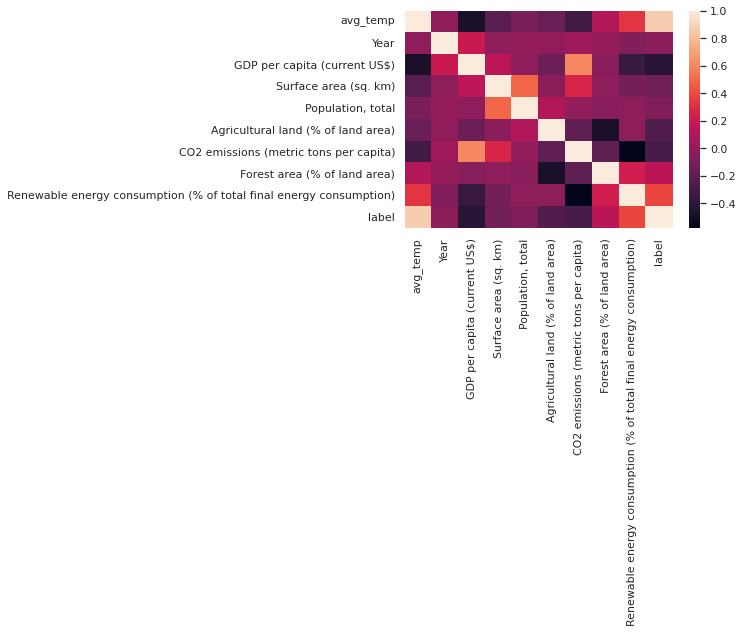

In [ ]:
sns.heatmap(country_data_cleaned_corr)
plt.show()

# Machine Learning Models


After creating and clearning our dataset, we need to split it into features and labels. We converted the average temperature to binary labels above, we only need to predict whether the temperature is high (1) or low (0) instead of the actual temperature.


The features will be the following attributes:
	`Year`,	`GDP per capita (current US$)`,	`Surface area (sq. km)`,	`Population ,total`,	`Agricultural land (% of land area)`,	`CO2 emissions (metric tons per capita)`,	`Forest area (% of land area)`,	and `Renewable energy consumption (% of total final energy consumption)`. The label will be the binary indicator created above, indicating if the temperature is above average. We will store these two as features and labels, respectively.

Since our label is a binary feature that determines whether the temperature is above or below average the yearly average. If the temperature is above average, it is denoted 1; if it is below average, it is denoted -1. Since it is a binary classification problem, we choose to start with two baseline models: logistic regression and naive bayes. We choose these two models because they are relatively simple to interpret and explain. After running these two models, we got an accuracy of around 0.80 and 0.75 respectively. So, we think of doing two blackbox models which are random forest and KNN, which yield an accuracy score of 0.99 and 0.98 respectively. Finally, we decide to do a ROC curve to compare these four models with each other. It turns out that random forest yields the best result, which is expected because random forest uses ensembling m

In [ ]:
features = country_data_cleaned[['Year','GDP per capita (current US$)','Surface area (sq. km)','Population, total','Agricultural land (% of land area)',	'CO2 emissions (metric tons per capita)',	'Forest area (% of land area)',	'Renewable energy consumption (% of total final energy consumption)']]
labels = country_data_cleaned['label']

Now, we will use sklearn's `train_test_split` library and split data into train and test sets with 8:2 ratio, and store the resulting splits as x_train, x_test, y_train, and y_test.

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(features,labels,test_size=0.2,random_state=42)

Then we standardize `x_train` and `x_test` here

In [ ]:
from sklearn.preprocessing import StandardScaler
# scaling
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

Next, we will implement some machine learning models on our dataset to do classification. 

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(x_train,y_train)
y_pred_naive_bayes = naive_bayes.predict(x_test)

In [ ]:
from sklearn import metrics

naive_bayes_acc= metrics.accuracy_score(y_test, y_pred_naive_bayes)
naive_bayes_cm = metrics.confusion_matrix(y_test, y_pred_naive_bayes)
print(naive_bayes_acc)
print(metrics.classification_report(y_test, y_pred_naive_bayes))

0.7413509060955519
              precision    recall  f1-score   support

        -1.0       0.88      0.41      0.56       241
         1.0       0.71      0.96      0.82       366

    accuracy                           0.74       607
   macro avg       0.79      0.68      0.69       607
weighted avg       0.78      0.74      0.71       607



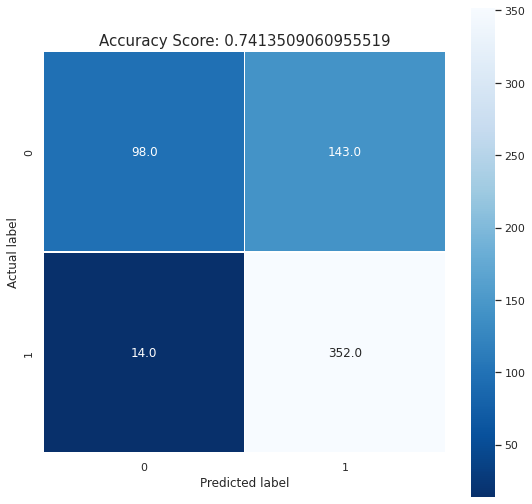

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(naive_bayes_cm, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(naive_bayes_acc)
plt.title(all_sample_title, size = 15);

## Logistic Regression 

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
y_pred_log_reg = log_reg.predict(x_test)

In [ ]:
from sklearn import metrics

log_reg_acc= metrics.accuracy_score(y_test, y_pred_log_reg)
log_reg_cm = metrics.confusion_matrix(y_test, y_pred_log_reg)

print(log_reg_acc)
print(metrics.classification_report(y_test, y_pred_log_reg))

0.8121911037891268
              precision    recall  f1-score   support

        -1.0       0.85      0.64      0.73       241
         1.0       0.80      0.92      0.86       366

    accuracy                           0.81       607
   macro avg       0.82      0.78      0.79       607
weighted avg       0.82      0.81      0.81       607



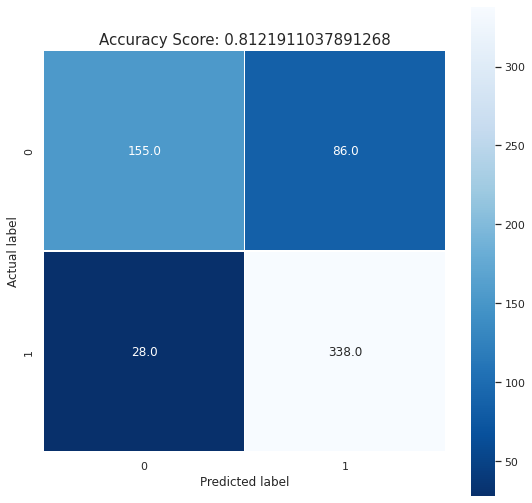

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(log_reg_cm, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(log_reg_acc)
plt.title(all_sample_title, size = 15);

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rclf=RandomForestClassifier(n_estimators=50,max_depth=15,random_state=50)
rclf.fit(x_train, y_train)
y_pred_rclf = rclf.predict(x_test)

In [ ]:
from sklearn import metrics

rclf_acc= metrics.accuracy_score(y_test, y_pred_rclf)
rclf_cm = metrics.confusion_matrix(y_test, y_pred_rclf)

print(rclf_acc)
print(metrics.classification_report(y_test, y_pred_rclf))

0.9868204283360791
              precision    recall  f1-score   support

        -1.0       0.98      0.99      0.98       241
         1.0       0.99      0.98      0.99       366

    accuracy                           0.99       607
   macro avg       0.98      0.99      0.99       607
weighted avg       0.99      0.99      0.99       607



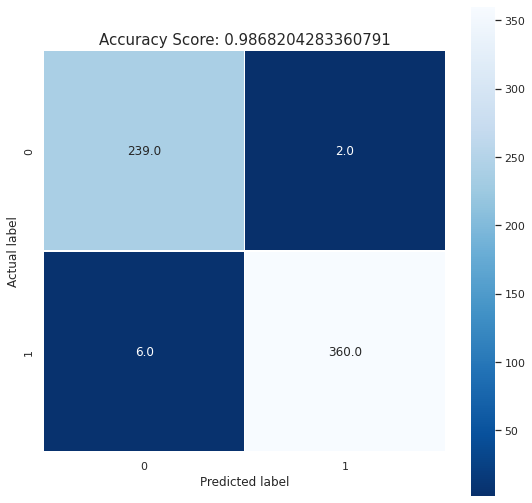

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(rclf_cm, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(rclf_acc)
plt.title(all_sample_title, size = 15);

## K-Nearest Neighbors

In [ ]:
# print out best parameters
def print_best_params(results):
    print('best_params: {}\n'.format(results.best_params_))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


param_grid = { 
    'n_neighbors': [5,10,20,50],
    'weights': ['uniform','distance'],
    'metric' : ['euclidean','manhattan','minkowski']
}


knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv= 3)
knn.fit(x_train, y_train)

print_best_params(knn)

best_params: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}



In [ ]:
knn_= KNeighborsClassifier(n_neighbors=5,weights='distance',metric='manhattan')
knn_.fit(x_train, y_train)
y_pred_knn = knn_.predict(x_test)

In [ ]:
from sklearn import metrics

knn_acc= metrics.accuracy_score(y_test, y_pred_knn)
knn_cm = metrics.confusion_matrix(y_test, y_pred_knn)

print(knn_acc)
print(metrics.classification_report(y_test, y_pred_knn))

0.9818780889621087
              precision    recall  f1-score   support

        -1.0       0.98      0.98      0.98       241
         1.0       0.98      0.99      0.98       366

    accuracy                           0.98       607
   macro avg       0.98      0.98      0.98       607
weighted avg       0.98      0.98      0.98       607



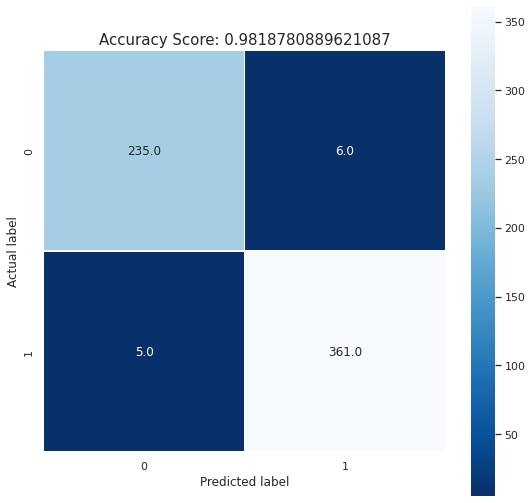

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(knn_cm, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(knn_acc)
plt.title(all_sample_title, size = 15);

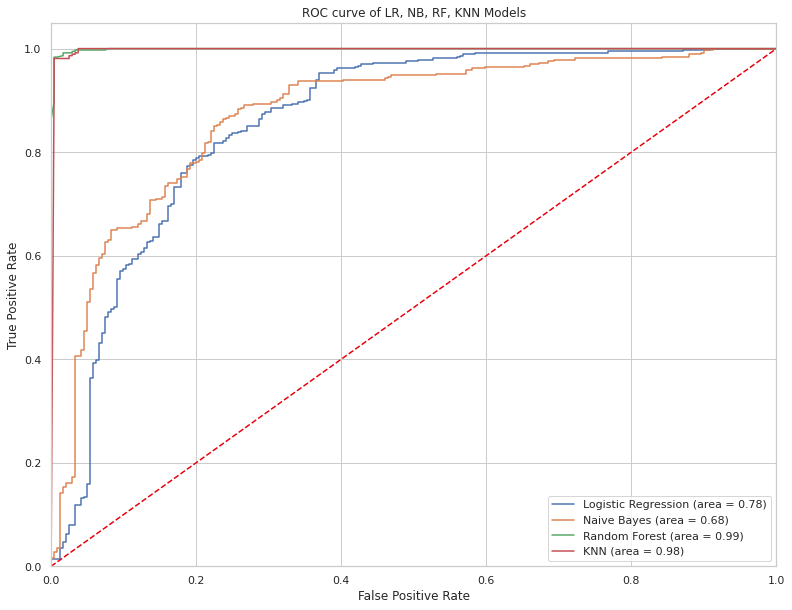

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, y_pred_log_reg)
fpr1, tpr1, thresholds1 = roc_curve(y_test, log_reg.predict_proba(x_test)[:,1])

bayes_roc_auc = roc_auc_score(y_test, y_pred_naive_bayes)
fpr2, tpr2, thresholds2 = roc_curve(y_test, naive_bayes.predict_proba(x_test)[:,1])

rclf_roc_auc = roc_auc_score(y_test, y_pred_rclf)
fpr3, tpr3, thresholds3 = roc_curve(y_test, rclf.predict_proba(x_test)[:,1])

knn_roc_auc = roc_auc_score(y_test, y_pred_knn)
fpr4, tpr4, thresholds4 = roc_curve(y_test, knn.predict_proba(x_test)[:,1])

plt.figure(figsize=(13,10))
plt.plot(fpr1, tpr1, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr2, tpr2, label='Naive Bayes (area = %0.2f)' % bayes_roc_auc)
plt.plot(fpr3, tpr3, label='Random Forest (area = %0.2f)' % rclf_roc_auc)
plt.plot(fpr4, tpr4, label='KNN (area = %0.2f)' % knn_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of LR, NB, RF, KNN Models')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Time Series Analysis

## Prepare time series data

At here, we use the global average temperature between `1990-01-01` and `2010-12-31` for time series analysis. So we first select the data we need and then set the index of dataframe to be a big timestamp `dt`.

In [ ]:
temp_global['dt']=pd.to_datetime(temp_global['dt'])

In [ ]:
temp_series=temp_global[temp_global['dt']>='1900-01-01']
temp_series=temp_series[temp_series['dt']<='2010-12-31']
temp_series['date']=temp_series['dt']

In [ ]:
temp_series=temp_series.set_index('dt')

In [ ]:
temp_series

LandAverageTemperature  year  month CalenderMonth       date
dt                                                                      
1900-01-01                   1.461  1900      1       January 1900-01-01
1900-02-01                   3.098  1900      2      Feburary 1900-02-01
1900-03-01                   5.492  1900      3         March 1900-03-01
1900-04-01                   8.223  1900      4         April 1900-04-01
1900-05-01                  11.385  1900      5           May 1900-05-01
...                            ...   ...    ...           ...        ...
2010-08-01                  14.768  2010      8        August 2010-08-01
2010-09-01                  12.863  2010      9     September 2010-09-01
2010-10-01                  10.442  2010     10       October 2010-10-01
2010-11-01                   7.487  2010     11      November 2010-11-01
2010-12-01                   4.292  2010     12      December 2010-12-01

[1332 rows x 5 columns]

## Time series data visuallization 

Follow what we learned from the class, we do some time series visuallization.

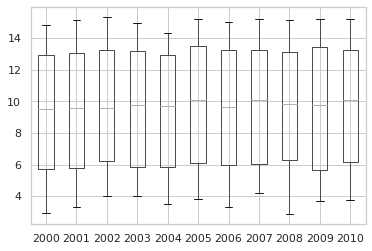

In [ ]:
# Code from colab on the google sites of CIS545
series=temp_series[temp_series['date']>='2000-01-01'].LandAverageTemperature
groups=series.groupby(pd.Grouper(freq='A'))
years=pd.DataFrame()
for name, group in groups:
  years[name.year]=group.values
years.boxplot()

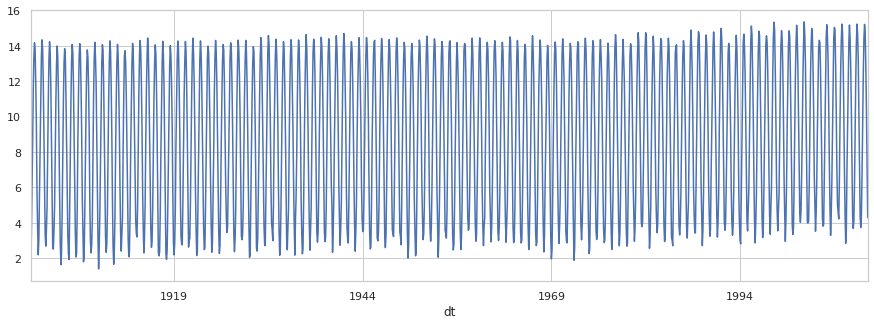

In [ ]:
series=temp_series['LandAverageTemperature']
plt.rcParams['figure.figsize']=(15,5)
series.plot()

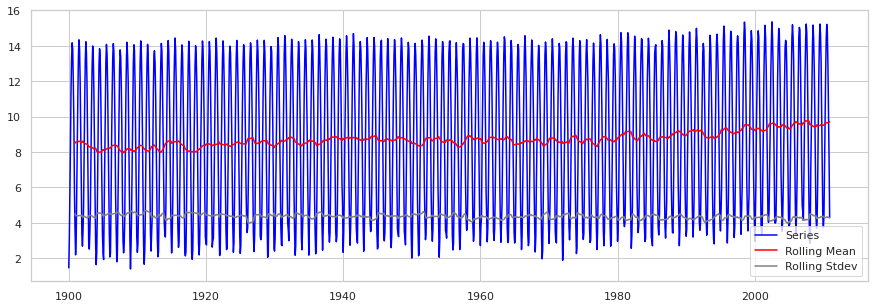

In [ ]:
# Code from colab notebook
rolling_mean = pd.Series.rolling(series,center=False,window=12).mean()
rolling_std = pd.Series.rolling(series,center=False,window=12).std()
 
plt.plot(series,color='blue',label='Series')
plt.plot(rolling_mean,color='red', label='Rolling Mean')
plt.plot(rolling_std,color='gray',label='Rolling Stdev')
plt.legend()

## Plot autocorrelation function and Partial autucorrelation function

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
The folder you are executing pip from can no longer be found.


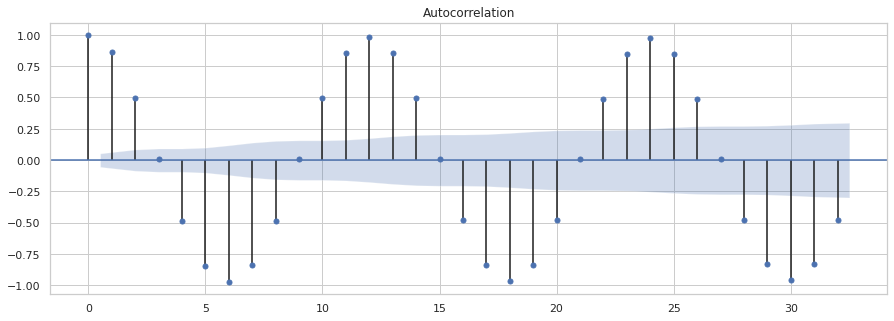

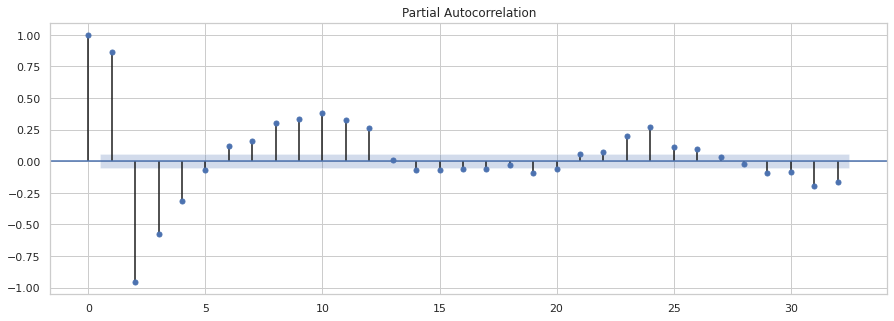

In [ ]:
import statsmodels
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
statsmodels.__version__
!pip install statsmodels --upgrade
fig=plot_acf(series)
fig=plot_pacf(series)

## Test for stationarity 

As we all know, the basic `ARIMA` model works for statinary time series. So we do the ADF-test to find out if our dataset is stationary or not.

In [ ]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(series)
result
print('Results of ADF Test:')
print('Test Statistic:{}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

Results of ADF Test:
Test Statistic:-0.9112814622027904
p-value: 0.784234571006663
Critical Values:
	1%: -3.435359311744588
	5%: -2.863752202145595
	10%: -2.5679477886494775


From the ADF test we can find it is not stationary! Now we have two choice: 

1. Make the data become stationary
2. Use other model that contain the seasonal trend

For the project, we use `SARIMAX` model, which is based on `ARIMA` and contains the seasonal trend.

## Machine Learning with SARIMAX model

### Import library and train-test split

At here, as we are studying a time series, we do the train-test split to let the first 95% data in the series to be train data and the rest to be test data.

In [ ]:
import itertools
from itertools import product
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
# split train and test
N=len(temp_series)
train_size=round(N*0.95)
test_size=round(N*0.05)
train_date=temp_series.date[:train_size]
train_temp=temp_series.LandAverageTemperature[:train_size]
test_date=temp_series.date[len(train_date)-1:N]
test_temp=temp_series.LandAverageTemperature[len(train_temp)-1:N]


### Define a function to search for the best parameter

Follow the article in two links, we write similar function to find out the best parameters `(p,d,q)` for the model.

In [ ]:
# refer code from https://towardsdatascience.com/weather-forecasting-with-machine-learning-using-python-55e90c346647
# and https://towardsdatascience.com/how-to-forecast-sales-with-python-using-sarima-model-ba600992fa7d

p=d=q=range(0,3)
pdq=list(itertools.product(p,d,q))
seasonal_pdq=[(x[0],x[1],x[2],12 ) for x in list(itertools.product(p,d,q))]

In [ ]:
def search_para_arima(order_list, series):
  result=[]
  for order in order_list:
    model=SARIMAX(series,order=order).fit(disp=-1)
    aic=model.aic
    result.append([order,aic])
  
  result_df=pd.DataFrame(result)
  result_df.columns=['order','AIC']
  return result

In [ ]:
order_list=[]
for p in range(1,6):
  for q in range(1,6):
    order_list.append(tuple([p,1,q]))
  
result_d_1=search_para_arima(order_list,train_temp)

In [ ]:
result_d_1

[[(1, 1, 1), 3837.391994297131],
 [(1, 1, 2), 4456.3236253053965],
 [(1, 1, 3), 3357.730047633917],
 [(1, 1, 4), 3215.382845160443],
 [(1, 1, 5), 3194.8956363801053],
 [(2, 1, 1), 2185.2851599996575],
 [(2, 1, 2), 1200.5122491680563],
 [(2, 1, 3), 934.7913386309576],
 [(2, 1, 4), 896.4132562632572],
 [(2, 1, 5), 1032.816009753353],
 [(3, 1, 1), 1578.1194915744413],
 [(3, 1, 2), 1045.9455027674996],
 [(3, 1, 3), 1163.0789185130443],
 [(3, 1, 4), 929.4309104121207],
 [(3, 1, 5), 865.2372180933252],
 [(4, 1, 1), 1330.8868564829977],
 [(4, 1, 2), 1581.9223785901554],
 [(4, 1, 3), 1051.0293544078127],
 [(4, 1, 4), 948.8513139623584],
 [(4, 1, 5), 878.7790248765477],
 [(5, 1, 1), 1215.4565304145794],
 [(5, 1, 2), 1200.5527977446536],
 [(5, 1, 3), 1488.5539487818703],
 [(5, 1, 4), 1040.5040468968823],
 [(5, 1, 5), 871.8156656242966]]

### Machine Learning Process

Finally, we can do machine learning and predict for the future.

In [ ]:
model=SARIMAX(train_temp,order=(3,1,5)).fit()
print(model.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



                             Statespace Model Results                             
Dep. Variable:     LandAverageTemperature   No. Observations:                 1265
Model:                   SARIMAX(3, 1, 5)   Log Likelihood                -423.619
Date:                    Thu, 16 Dec 2021   AIC                            865.237
Time:                            00:18:41   BIC                            911.516
Sample:                        01-01-1900   HQIC                           882.625
                             - 05-01-2005                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7739      0.033     23.215      0.000       0.709       0.839
ar.L2          0.6589      0.058     11.417      0.000       0.546       0.772
ar.L3         -0.957

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



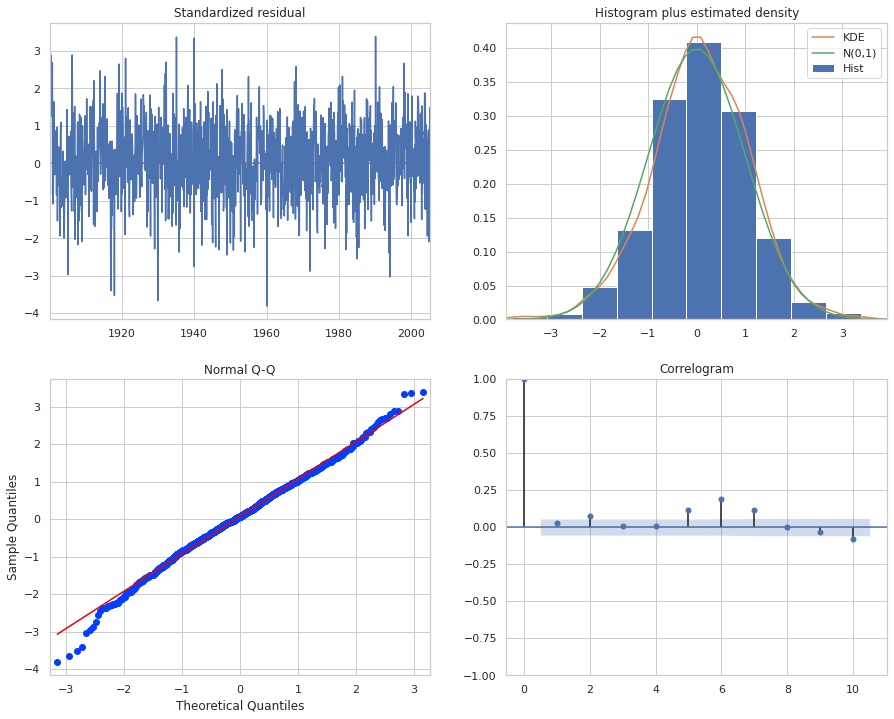

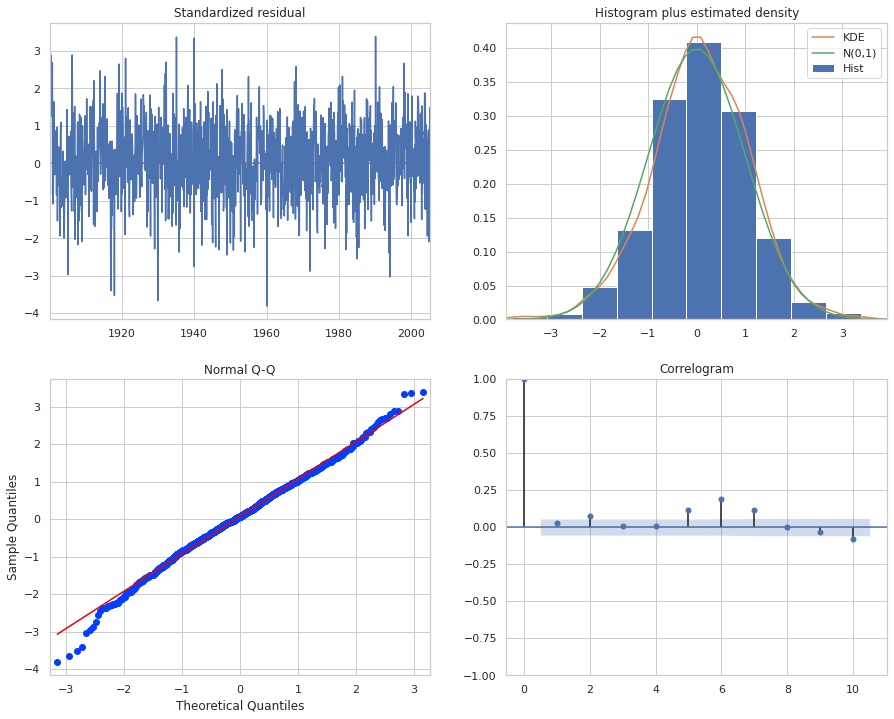

In [ ]:
model.plot_diagnostics(figsize=(15,12))

In [ ]:
forecast=model.get_prediction(start=train_size,end=train_size+test_size-1)
forec=forecast.predicted_mean
ci=forecast.conf_int(alpha=0.05)

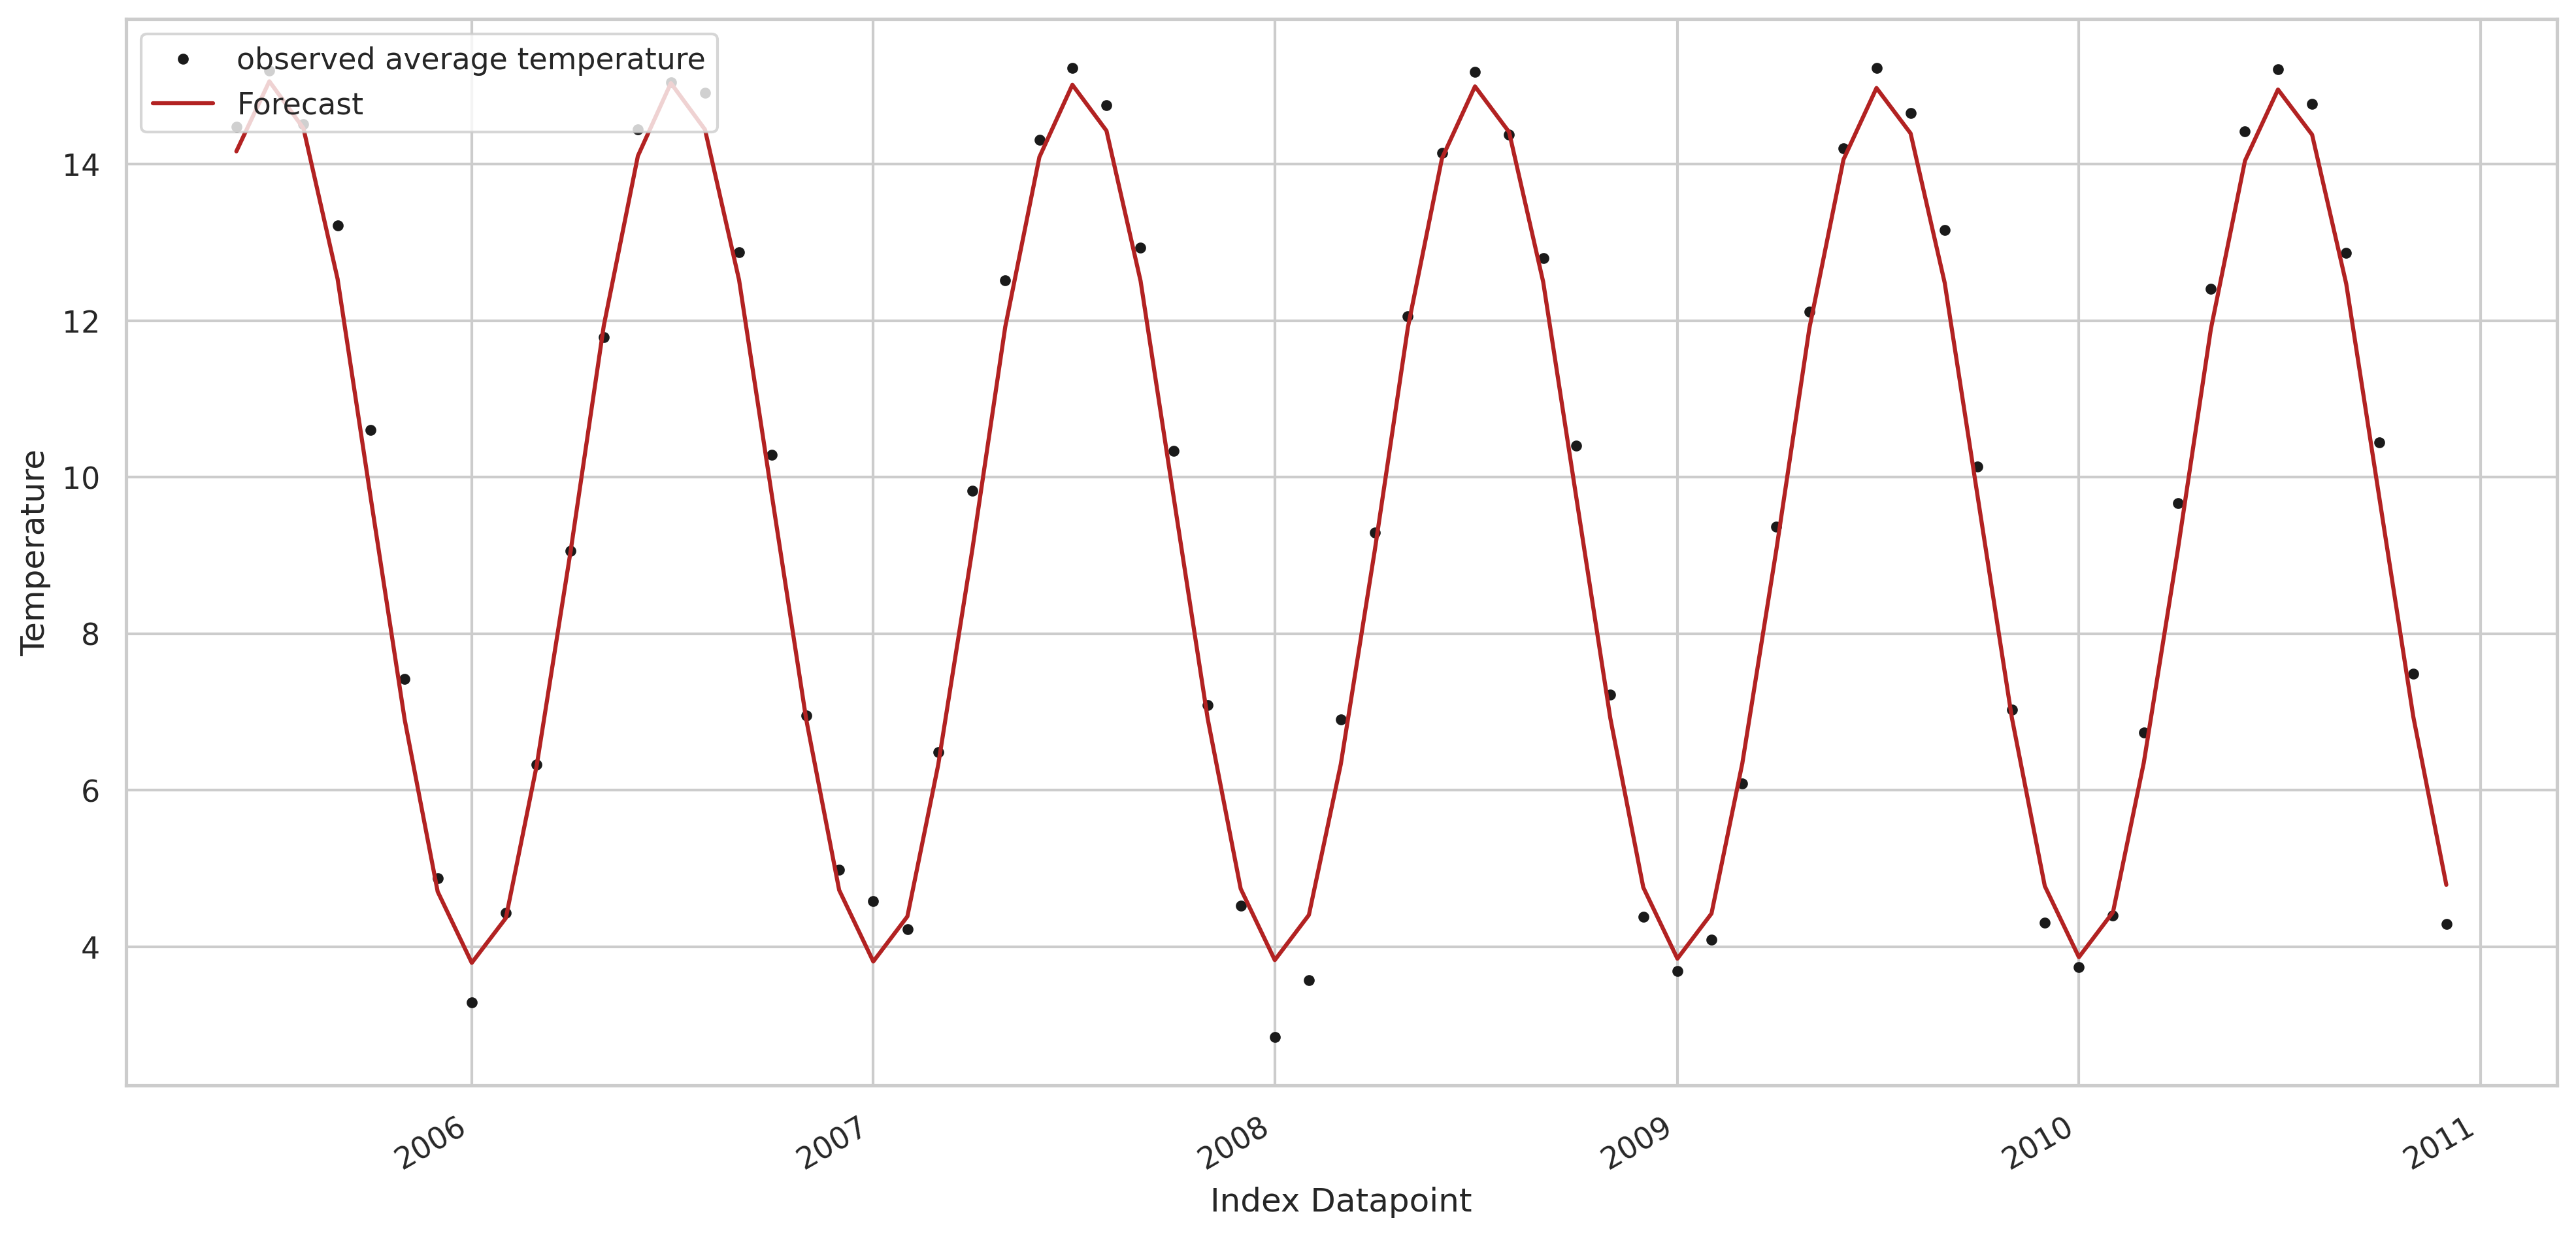

In [ ]:
fig,ax=plt.subplots(figsize=(16,8),dpi=300)
x0=temp_series.index[0:train_size]
x1=temp_series.index[train_size:train_size+test_size]
#plt.plot(x0,temp_series.LandAverageTemperature[0:train_size],'k',label='Average Temperature')
plt.plot(temp_series.LandAverageTemperature[train_size:train_size+test_size],'.k',label='observed average temperature')
forec=pd.DataFrame(forec,columns=['f'],index=x1)
forec.f.plot(ax=ax,color='firebrick',label='Forecast')
plt.legend(loc = 'upper left')
plt.xlabel('Index Datapoint')
plt.ylabel('Temperature')
plt.show()

# Conclusion

In this project, we implemented four machine learning models to predict whether the average temperature for each country in each year is above or below the average tempereature of that year. As shown above, our black-box models, i.e. Random Forest and K-Nearest Neighbors, perform better than our baseline models, i.e. Naive Bayes and Logistic Regression. All four models have pretty good accuaries to classify the average temperature. 

Besides, we also performed time series analysis to forecast the average temperature throughout the years. From above graphs, we can see that predictions of our model align with the true average temperatures. 


## Limitations and Further Considerations

In the future, what we can do with modeling is to add more features. In our case, we found 8 features on the world bank website. However, there could be additional features if we spend more time digging on the world bank website, for example, we can add annual electricity consumption per country, cereal yield, etc. If we add more features, maybe there would be higher accuracy. However, it might also cause problem with multicollinearity, which is correlation among feature variables. Currently, we do not have that problem because we only have 8 features. 

Another further interesting step might be finding more datasets related to the temperature and sea level to predict whether sea level would increase in future years.